In [1]:
import numpy as np
import sys
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import glob

np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# VEST NC 2020

## VEST's Documentation File

Election results and precinct shapefile from the NC State Board of Elections (https://www.ncsbe.gov/results-data)

Buncombe 681, Henderson CV, Wake 01-07A, 07-07A are missing from the 20201018 shapefile. They are added from the 20190827 shapefile.

North Carolina produces two sets of election results data. The precinct results are the unaltered results as initially reported by the counties. Many counties report early votes by vote center while provisional and other nonstandard ballots may be reported countywide. The precinct-sorted results are then produced within 30 days after the election. In the precinct-sorted data nearly all votes are assigned to precincts regardless of the manner by which the ballots were cast. However, North Carolina law requires the addition of statistical "noise" to the precinct-sorted data wherever any given vote by any specific voter may otherwise be deduced via cross referencing the various election-related data sets produced by the SBE.

For the 2020 general election 51 counties reported all votes by precinct in their initial precinct results. The precinct-sorted data set was used instead for the counties listed below.

Alleghany, Avery, Beaufort, Bertie\*, Bladen, Buncombe, Cabarrus, Caldwell, Camden, Currituck, Dare, Davidson\*, Davie, Duplin\*, Durham\*, Edgecombe, Guilford, Halifax\*, Harnett, Haywood, Henderson, Hertford, Hyde, Johnston, Jones, Lee, Lincoln, Macon, Martin, Mecklenburg\*, Moore, Nash, New Hanover\*, Northampton\*, Orange, Pasquotank, Pitt\*, Polk, Richmond, Scotland, Stokes\*, Surry\*, Tyrrell\*, Wake, Washington, Watauga, Wayne, Wilkes\*, Yadkin

In counties marked by asterisk some votes were still reported by vote center or countywide in the precinct-sorted data. These were distributed by candidate to precincts based on the precinct-level reported vote. The precinct-sorted results were further adjusted to match the certified countywide totals based on the precinct-level vote by candidate.

G20PRERTRU - Donald J. Trump (Republican Party)  
G20PREDBID - Joseph R. Biden (Democratic Party)  
G20PRELJOR - Jo Jorgensen (Libertarian Party)  
G20PREGHAW - Howie Hawkins (Green Party)  
G20PRECBLA - Don Blankenship (Constitution Party)  
G20PREOWRI - Write-in Votes  

G20USSRTIL - Thom Tillis (Republican Party)  
G20USSDCUN - Cal Cunningham (Democratic Party)  
G20USSLBRA - Shannon W. Bray (Libertarian Party)  
G20USSCHAY - Kevin E. Hayes (Constitution Party)  

G20GOVRFOR - Dan Forest (Republican Party)  
G20GOVDCOO - Roy Cooper (Democratic Party)  
G20GOVLDIF - Steven K. DiFiore (Libertarian Party)  
G20GOVCPIS - Al Pisano (Constitution Party)  

G20LTGRROB - Mark Robinson (Republican Party)  
G20LTGDHOL - Yvonne Lewis Holley (Democratic Party)  

G20ATGRONE - Jim O'Neill (Republican Party)  
G20ATGDSTE - Josh Stein (Democratic Party)  

G20TRERFOL - Dale R. Folwell (Republican Party)  
G20TREDCHA - Ronnie Chatterji (Democratic Party)  

G20SOSRSYK - E.C. Sykes (Republican Party)  
G20SOSDMAR - Elaine Marshall (Democratic Party)  

G20AUDRSTR - Anthony Wayne (Tony) Street (Republican Party)  
G20AUDDWOO - Beth A. Wood (Democratic Party)  

G20AGRRTRO - Steve Troxler (Republican Party)  
G20AGRDWAD - Jenna Wadsworth (Democratic Party)  

G20INSRCAU - Mike Causey (Republican Party)  
G20INSDGOO - Wayne Goodwin (Democratic Party)  

G20LABRDOB - Josh Dobson (Republican Party)  
G20LABDHOL - Jessica Holmes (Democratic Party)  

G20SPIRTRU - Catherine Truitt (Republican Party)  
G20SPIDMAN - Jen Mangrum (Democratic Party)  

G20SSCRNEW - Paul Newby (Republican Party)  
G20SSCDBEA - Cheri Beasley (Democratic Party)  

G20SSCRBER - Phil Berger, Jr. (Republican Party)  
G20SSCDINM - Lucy Inman (Democratic Party)  

G20SSCRBAR - Tamara Barringer (Republican Party)  
G20SSCDDAV - Mark Davis (Democratic Party)  

G20SACRWOO - April C. Wood (Republican Party)  
G20SACDSHI - Tricia Shields (Democratic Party)  

G20SACRGOR - Fred Gore (Republican Party)  
G20SACDCUB - Lora Christine Cubbage (Democratic Party)  

G20SACRDIL - Chris Dillon (Republican Party)  
G20SACDSTY - Gray Styers (Democratic Party)  

G20SACRCAR - Jeff Carpenter (Republican Party)  
G20SACDYOU - Reuben F. Young (Democratic Party)  

G20SACRGRI - Jefferson G. Griffin (Republican Party)  
G20SACDBRO - Chris Brook (Democratic Party)  

## Load VEST's Final File

In [2]:
vest_shp = gp.read_file("./raw-from-source/VEST/nc_2020/nc_2020.shp")

In [3]:
vest_shp.shape

(2662, 53)

In [4]:
#vest_shp.head(1)

<AxesSubplot:>

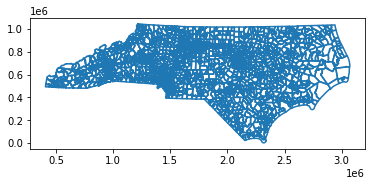

In [5]:
vest_shp.boundary.plot()

# Election Results

## Load in Election Results

Downloaded SOS Election Results using the same file linked by VEST.

In [6]:
election_results = pd.read_csv('./raw-from-source/SOS/results_pct_20201103/results_pct_20201103.txt', sep='\t', lineterminator='\n')

In [7]:
election_results.sort_values(by=['County', 'Precinct','Contest Name']).head(1)

,County,Election Date,Precinct,Contest Group ID,Contest Type,Contest Name,Choice,Choice Party,Vote For,Election Day,One Stop,Absentee by Mail,Provisional,Total Votes,Real Precinct,\r
32933,ALAMANCE,11/03/2020,01,1,C,ALAMANCE COUNTY BOARD OF COMMISSIONERS,Bob Byrd,DEM,3,92,311,167,1,571,Y,\r


In [8]:
#Read in Sorted precinct files for counties listed by VEST
path = "./raw-from-source/SOS/results_pct_20201103/County Results"
  
# csv files in the path
files = glob.glob(path + "/*.txt")
  
# defining an empty list to store 
# content
nc_2020_counties = pd.DataFrame()
content = []
  
# checking all the csv files in the 
# specified path
for filename in files:
    
    # reading content of csv file
    # content.append(filename)
    nc_2020_counties = pd.read_csv(filename, sep='\t', lineterminator='\n')
    content.append(nc_2020_counties)
    
# converting content to data frame
df_2020_cnty = pd.concat(content)
print(df_2020_cnty.shape)
df_2020_cnty.head(1)

(1498584, 19)


,county_id,county,election_dt,result_type_lbl,result_type_desc,contest_id,contest_title,contest_party_lbl,contest_vote_for,precinct_code,precinct_name,candidate_id,candidate_name,candidate_party_lbl,group_num,group_name,voting_method_lbl,voting_method_rslt_desc,vote_ct\r
0,77,RICHMOND,11/03/2020,STD,<NORMAL>,654,RICHMOND COUNTY BOARD OF COMMISSIONERS,NaN,3,01,ROCKINGHAM #1,1689,Andy Grooms,REP,2,ELECTION DAY,V,Election Day,145


In [9]:
#Get counties using Sorted files and remove from state file
counties = df_2020_cnty.county.unique()
df_2020_cnty.columns = ["county_id","County","Election Date","result_type_lbl","result_type_desc","contest_id","Contest Name","Choice Party","contest_vote_for","Precinct","Precinct Name","candidate_id","Choice","Choice Party","group_num","group_name","voting_method","voting method_rslt","Total Votes"]
election_results = election_results[~election_results['County'].isin(counties)]

In [10]:
#Sum precinct votes for candidates
df_2020_cnty = df_2020_cnty.groupby(['County', 'Contest Name', 'Precinct', 'Choice'])["Total Votes"].sum().reset_index()

In [11]:
election_results = pd.concat([election_results,df_2020_cnty], axis=0, ignore_index=True)

In [12]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="North Carolina"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Make FIPS County Name uppercase
fips_file['County Name']=fips_file['County Name'].str.upper()

#Create the dictionary
nc_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))
#Create list of fips codes
fips_file["unique_ID"] =  "37" + fips_file["FIPS County"]
fips_codes = fips_file["unique_ID"].tolist()

In [13]:
#Combine Presidential Write In votes
election_results.loc[(election_results['Choice'] == "Write-In (Miscellaneous)") & (election_results["Contest Name"] == "US PRESIDENT"), "Choice"] = "Write-In Votes"
election_results.loc[(election_results['Choice'] == "Jade Simmons (Write-In)") & (election_results["Contest Name"] == "US PRESIDENT"), "Choice"] = "Write-In Votes"

In [14]:
#Create a list of candidates from the VEST documentation

# List of candidates names from VEST documentation
office_list = ['Donald J. Trump','Joseph R. Biden','Jo Jorgensen','Howie Hawkins','Don Blankenship',"Write-In Votes",'Thom Tillis',
        'Cal Cunningham','Shannon W. Bray','Kevin E. Hayes','Dan Forest','Roy Cooper','Steven J. DiFiore','Al Pisano','Mark Robinson','Yvonne Lewis Holley',"Jim O'Neill",'Josh Stein','Dale R. Folwell','Ronnie Chatterji','E.C. Sykes','Elaine Marshall','Anthony Wayne (Tony) Street','Beth A. Wood','Steve Troxler','Jenna Wadsworth','Mike Causey','Wayne Goodwin','Josh Dobson','Jessica Holmes','Catherine Truitt','Jen Mangrum','Paul Newby','Cheri Beasley','Phil Berger, Jr.','Lucy Inman','Tamara Barringer','Mark Davis','April C. Wood','Tricia Shields','Fred Gore','Lora Christine Cubbage','Chris Dillon','Gray Styers','Jeff Carpenter','Reuben F. Young','Jefferson G. Griffin','Chris Brook']
office_list = sorted(office_list)

In [15]:
election_results = election_results[election_results["Choice"].isin(office_list)]

In [16]:
election_results["Choice"].unique()

array(['Jen Mangrum', 'Jessica Holmes', 'Chris Dillon', 'Donald J. Trump',
       'Cheri Beasley', 'Paul Newby', 'April C. Wood', 'Josh Stein',
       'Steve Troxler', 'Phil Berger, Jr.', 'Thom Tillis',
       'Jefferson G. Griffin', 'Lucy Inman', 'Cal Cunningham',
       'E.C. Sykes', 'Wayne Goodwin', 'Write-In Votes', 'Kevin E. Hayes',
       'Fred Gore', 'Gray Styers', 'Jeff Carpenter',
       'Anthony Wayne (Tony) Street', 'Tricia Shields', 'Mike Causey',
       'Tamara Barringer', 'Reuben F. Young', 'Howie Hawkins',
       'Ronnie Chatterji', 'Chris Brook', 'Steven J. DiFiore',
       'Josh Dobson', 'Dan Forest', "Jim O'Neill",
       'Lora Christine Cubbage', 'Al Pisano', 'Dale R. Folwell',
       'Jenna Wadsworth', 'Mark Robinson', 'Catherine Truitt',
       'Elaine Marshall', 'Don Blankenship', 'Joseph R. Biden',
       'Roy Cooper', 'Beth A. Wood', 'Mark Davis', 'Jo Jorgensen',
       'Yvonne Lewis Holley', 'Shannon W. Bray'], dtype=object)

In [17]:
#Add FIPS columns
election_results["COUNTYFP10"] = election_results["County"].map(nc_fips_dict).fillna(election_results["County"])
vest_shp["COUNTYFP10"] = vest_shp['COUNTY_NAM'].map(nc_fips_dict).fillna(vest_shp['COUNTY_NAM'])

In [18]:
#Clean up precinct column by stripping the white space
election_results["Precinct"]=election_results["Precinct"].str.strip()

#Create a column to pivot table by concatenation the FIPS and precinct columns
election_results["pivot_col"]=election_results["COUNTYFP10"]+election_results["Precinct"]

In [19]:
#Run the pivot
pivoted_election_results = pd.pivot_table(election_results,values=["Total Votes"],index=["pivot_col"],columns=["Choice"],aggfunc=sum)

#Fill in N/A with 0
pivoted_election_results = pivoted_election_results.fillna(0)

#Clean the columns
pivoted_election_results.reset_index(drop=False,inplace=True)
pivoted_election_results.columns = pivoted_election_results.columns.droplevel(0)

In [20]:
pivoted_election_results.head(1)

Choice,,Al Pisano,Anthony Wayne (Tony) Street,April C. Wood,Beth A. Wood,Cal Cunningham,Catherine Truitt,Cheri Beasley,Chris Brook,Chris Dillon,Dale R. Folwell,Dan Forest,Don Blankenship,Donald J. Trump,E.C. Sykes,Elaine Marshall,Fred Gore,Gray Styers,Howie Hawkins,Jeff Carpenter,Jefferson G. Griffin,Jen Mangrum,Jenna Wadsworth,Jessica Holmes,Jim O'Neill,Jo Jorgensen,Joseph R. Biden,Josh Dobson,Josh Stein,Kevin E. Hayes,Lora Christine Cubbage,Lucy Inman,Mark Davis,Mark Robinson,Mike Causey,Paul Newby,"Phil Berger, Jr.",Reuben F. Young,Ronnie Chatterji,Roy Cooper,Shannon W. Bray,Steve Troxler,Steven J. DiFiore,Tamara Barringer,Thom Tillis,Tricia Shields,Wayne Goodwin,Write-In Votes,Yvonne Lewis Holley
0,00101,13,2247,2290,608,564,2301,630,568,2296,2240,2209,5,2299,2251,617,2276,548,6,2280,2274,558,485,573,2266,27,566,2293,618,51,571,588,596,2336,2304,2239,2275,567,611,661,68,2401,19,2259,2205,566,561,4,556


In [21]:
pivoted_election_results.columns.values[0] = "join_col"

In [22]:
pivoted_election_results.head(1)

Choice,join_col,Al Pisano,Anthony Wayne (Tony) Street,April C. Wood,Beth A. Wood,Cal Cunningham,Catherine Truitt,Cheri Beasley,Chris Brook,Chris Dillon,Dale R. Folwell,Dan Forest,Don Blankenship,Donald J. Trump,E.C. Sykes,Elaine Marshall,Fred Gore,Gray Styers,Howie Hawkins,Jeff Carpenter,Jefferson G. Griffin,Jen Mangrum,Jenna Wadsworth,Jessica Holmes,Jim O'Neill,Jo Jorgensen,Joseph R. Biden,Josh Dobson,Josh Stein,Kevin E. Hayes,Lora Christine Cubbage,Lucy Inman,Mark Davis,Mark Robinson,Mike Causey,Paul Newby,"Phil Berger, Jr.",Reuben F. Young,Ronnie Chatterji,Roy Cooper,Shannon W. Bray,Steve Troxler,Steven J. DiFiore,Tamara Barringer,Thom Tillis,Tricia Shields,Wayne Goodwin,Write-In Votes,Yvonne Lewis Holley
0,00101,13,2247,2290,608,564,2301,630,568,2296,2240,2209,5,2299,2251,617,2276,548,6,2280,2274,558,485,573,2266,27,566,2293,618,51,571,588,596,2336,2304,2239,2275,567,611,661,68,2401,19,2259,2205,566,561,4,556


In [23]:
#Add FIPS State and County columns
pivoted_election_results.insert(loc=0, column='STATEFP10', value='34')
pivoted_election_results.insert(loc=1, column='COUNTYFP10', value=pivoted_election_results['join_col'].str[0:3])
pivoted_election_results.insert(loc=3, column='Precinct', value=pivoted_election_results['join_col'].str[3:])

In [24]:
pivoted_election_results.head(1)

Choice,STATEFP10,COUNTYFP10,join_col,Precinct,Al Pisano,Anthony Wayne (Tony) Street,April C. Wood,Beth A. Wood,Cal Cunningham,Catherine Truitt,Cheri Beasley,Chris Brook,Chris Dillon,Dale R. Folwell,Dan Forest,Don Blankenship,Donald J. Trump,E.C. Sykes,Elaine Marshall,Fred Gore,Gray Styers,Howie Hawkins,Jeff Carpenter,Jefferson G. Griffin,Jen Mangrum,Jenna Wadsworth,Jessica Holmes,Jim O'Neill,Jo Jorgensen,Joseph R. Biden,Josh Dobson,Josh Stein,Kevin E. Hayes,Lora Christine Cubbage,Lucy Inman,Mark Davis,Mark Robinson,Mike Causey,Paul Newby,"Phil Berger, Jr.",Reuben F. Young,Ronnie Chatterji,Roy Cooper,Shannon W. Bray,Steve Troxler,Steven J. DiFiore,Tamara Barringer,Thom Tillis,Tricia Shields,Wayne Goodwin,Write-In Votes,Yvonne Lewis Holley
0,34,001,00101,01,13,2247,2290,608,564,2301,630,568,2296,2240,2209,5,2299,2251,617,2276,548,6,2280,2274,558,485,573,2266,27,566,2293,618,51,571,588,596,2336,2304,2239,2275,567,611,661,68,2401,19,2259,2205,566,561,4,556


In [25]:
pivoted_election_results.columns = ["STATEFP10","COUNTYFP10","join_col","Precinct","G20GOVCPIS","G20AUDRSTR","G20SACRWOO","G20AUDDWOO","G20USSDCUN","G20SPIRTRU","G20SSCDBEA","G20SACDBRO","G20SACRDIL","G20TRERFOL","G20GOVRFOR","G20PRECBLA","G20PRERTRU","G20SOSRSYK","G20SOSDMAR","G20SACRGOR","G20SACDSTY","G20PREGHAW","G20SACRCAR","G20SACRGRI","G20SPIDMAN","G20AGRDWAD","G20LABDHOL","G20ATGRONE","G20PRELJOR","G20PREDBID","G20LABRDOB","G20ATGDSTE","G20USSCHAY","G20SACDCUB","G20SSCDINM","G20SSCDDAV","G20LTGRROB","G20INSRCAU","G20SSCRNEW","G20SSCRBER","G20SACDYOU","G20TREDCHA","G20GOVDCOO","G20USSLBRA","G20AGRRTRO","G20GOVLDIF","G20SSCRBAR","G20USSRTIL","G20SACDSHI","G20INSDGOO","G20PREOWRI","G20LTGDHOL"]

In [26]:
pivoted_election_results.head(1)

,STATEFP10,COUNTYFP10,join_col,Precinct,G20GOVCPIS,G20AUDRSTR,G20SACRWOO,G20AUDDWOO,G20USSDCUN,G20SPIRTRU,G20SSCDBEA,G20SACDBRO,G20SACRDIL,G20TRERFOL,G20GOVRFOR,G20PRECBLA,G20PRERTRU,G20SOSRSYK,G20SOSDMAR,G20SACRGOR,G20SACDSTY,G20PREGHAW,G20SACRCAR,G20SACRGRI,G20SPIDMAN,G20AGRDWAD,G20LABDHOL,G20ATGRONE,G20PRELJOR,G20PREDBID,G20LABRDOB,G20ATGDSTE,G20USSCHAY,G20SACDCUB,G20SSCDINM,G20SSCDDAV,G20LTGRROB,G20INSRCAU,G20SSCRNEW,G20SSCRBER,G20SACDYOU,G20TREDCHA,G20GOVDCOO,G20USSLBRA,G20AGRRTRO,G20GOVLDIF,G20SSCRBAR,G20USSRTIL,G20SACDSHI,G20INSDGOO,G20PREOWRI,G20LTGDHOL
0,34,001,00101,01,13,2247,2290,608,564,2301,630,568,2296,2240,2209,5,2299,2251,617,2276,548,6,2280,2274,558,485,573,2266,27,566,2293,618,51,571,588,596,2336,2304,2239,2275,567,611,661,68,2401,19,2259,2205,566,561,4,556


In [27]:
election_results = pivoted_election_results.copy()

## Compare vote totals before allocation

In [28]:
races = [x for x in vest_shp.columns if 'G20' in x]
races

['G20PRERTRU',
 'G20PREDBID',
 'G20PRELJOR',
 'G20PREGHAW',
 'G20PRECBLA',
 'G20PREOWRI',
 'G20USSRTIL',
 'G20USSDCUN',
 'G20USSLBRA',
 'G20USSCHAY',
 'G20GOVRFOR',
 'G20GOVDCOO',
 'G20GOVLDIF',
 'G20GOVCPIS',
 'G20LTGRROB',
 'G20LTGDHOL',
 'G20ATGRONE',
 'G20ATGDSTE',
 'G20TRERFOL',
 'G20TREDCHA',
 'G20SOSRSYK',
 'G20SOSDMAR',
 'G20AUDRSTR',
 'G20AUDDWOO',
 'G20AGRRTRO',
 'G20AGRDWAD',
 'G20INSRCAU',
 'G20INSDGOO',
 'G20LABRDOB',
 'G20LABDHOL',
 'G20SPIRTRU',
 'G20SPIDMAN',
 'G20SSCRNEW',
 'G20SSCDBEA',
 'G20SSCRBER',
 'G20SSCDINM',
 'G20SSCRBAR',
 'G20SSCDDAV',
 'G20SACRWOO',
 'G20SACDSHI',
 'G20SACRGOR',
 'G20SACDCUB',
 'G20SACRDIL',
 'G20SACDSTY',
 'G20SACRCAR',
 'G20SACDYOU',
 'G20SACRGRI',
 'G20SACDBRO']

In [29]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

107698248
107724776


In [30]:
def allocate_absentee(df_receiving_votes,df_allocating,column_list,col_allocating):
    original_cols = list(df_receiving_votes.columns)
    
    #Add in the "Total Votes column"
    df_receiving_votes.loc[:,"Total_Votes"]=0
    for race in column_list:
        df_receiving_votes.loc[:,"Total_Votes"]+=df_receiving_votes.loc[:,race]
    
    #Create the needed dataframes
    precinct_specific_totals = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())
    precinct_specific_totals.reset_index(drop=False,inplace=True)
    to_dole_out_totals = pd.DataFrame(df_allocating.groupby([col_allocating]).sum())
    to_dole_out_totals.reset_index(drop=False,inplace=True)
    
    #Print out any instances where the allocation, as written, won't work
    special_allocation_needed = []
    for index, row in precinct_specific_totals.iterrows():
        for race in column_list:
            if (row[race]==0):
                race_district = row[col_allocating]
                if race_district in to_dole_out_totals[col_allocating].unique():
                    to_allocate = int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==race_district][race])
                    if (to_allocate != 0):
                        special_allocation_needed.append([race_district,race])
    
    #Create some new columns for each of these races to deal with the allocation
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        df_receiving_votes.loc[:,add_var]=0.0
        df_receiving_votes.loc[:,rem_var]=0.0
        df_receiving_votes.loc[:,floor_var]=0.0

    #Iterate over the rows
    #Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
    for index, row in df_receiving_votes.iterrows():
        if row[col_allocating] in to_dole_out_totals[col_allocating].unique():
            for race in column_list:
                add_var = race+"_add"
                rem_var = race+"_rem"
                floor_var = race+"_floor"
                #Grab the district
                county_id = row[col_allocating]
                if [county_id,race] in special_allocation_needed:
                    #Get the denominator for the allocation - the summed "total votes" for precincts in that grouping
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id]["Total_Votes"]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the "total votes" for this particular precinct
                    val = df_receiving_votes.at[index,"Total_Votes"]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                else:
                    #Get the denominator for the allocation (the precinct vote totals)
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id][race]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the vote totals for this race in this precinct
                    val = df_receiving_votes.at[index,race]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                if ((float(denom)==0)):
                    vote_share = 0
                else:
                    vote_share = (float(val)/float(denom))*float(numer)
                df_receiving_votes.at[index,add_var] = vote_share
                #Take the decimal remainder of the allocation
                df_receiving_votes.at[index,rem_var] = vote_share%1
                #Take the floor of the allocation
                df_receiving_votes.at[index,floor_var] = np.floor(vote_share)

    #After the first pass through, get the sums of the races by district to assist in the rounding            
    first_allocation = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())

    #Now we want to iterate district by district to work on rounding
    county_list = list(to_dole_out_totals[col_allocating].unique()) 

    #Iterate over the district
    for county in county_list:
        for race in column_list:
            add_var = race+"_add"
            rem_var = race+"_rem"
            floor_var = race+"_floor"
            #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
            to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
            #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
            for index in df_receiving_votes.loc[df_receiving_votes[col_allocating]==county][rem_var].nlargest(to_go).index:
                df_receiving_votes.at[index,add_var] = np.ceil(df_receiving_votes.at[index,add_var])

    #Iterate over every race again
    for race in column_list:
        add_var = race+"_add"
        #Round every allocation down to not add fractional votes
        df_receiving_votes.loc[:,add_var]=np.floor(df_receiving_votes.loc[:,add_var])
        df_receiving_votes.loc[:,race]+=df_receiving_votes.loc[:,add_var]
        
    df_receiving_votes = df_receiving_votes[original_cols]
    
    return df_receiving_votes

In [31]:
searchfor = ['ABS', 'PROVISIONAL','ONE STOP','CURBSIDE','TRANS','OS ','OS-',' OS','PROVISIOINAL','OSAP','OSCA','OSCH','OSKD','OSLL','OSLOB','OSNR','OSOP','OSTA','OSWA','PROVI ']
in_sos =  election_results[election_results["Precinct"].str.contains('|'.join(searchfor))]
in_sos = in_sos.groupby(by=["COUNTYFP10"]).sum().reset_index()
in_sos

,COUNTYFP10,G20GOVCPIS,G20AUDRSTR,G20SACRWOO,G20AUDDWOO,G20USSDCUN,G20SPIRTRU,G20SSCDBEA,G20SACDBRO,G20SACRDIL,G20TRERFOL,G20GOVRFOR,G20PRECBLA,G20PRERTRU,G20SOSRSYK,G20SOSDMAR,G20SACRGOR,G20SACDSTY,G20PREGHAW,G20SACRCAR,G20SACRGRI,G20SPIDMAN,G20AGRDWAD,G20LABDHOL,G20ATGRONE,G20PRELJOR,G20PREDBID,G20LABRDOB,G20ATGDSTE,G20USSCHAY,G20SACDCUB,G20SSCDINM,G20SSCDDAV,G20LTGRROB,G20INSRCAU,G20SSCRNEW,G20SSCRBER,G20SACDYOU,G20TREDCHA,G20GOVDCOO,G20USSLBRA,G20AGRRTRO,G20GOVLDIF,G20SSCRBAR,G20USSRTIL,G20SACDSHI,G20INSDGOO,G20PREOWRI,G20LTGDHOL
0,001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,005,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,015,0,5,6,29,29,6,26,27,5,6,6,0,9,5,29,5,27,0,4,4,28,27,30,5,0,29,5,30,0,27,28,27,5,5,7,5,27,28,32,1,8,0,6,7,28,29,1,29
6,017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,025,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
#election_results = election_results[election_results['Real Precinct']=='Y']
election_results = election_results[~election_results["Precinct"].str.contains('|'.join(searchfor))]
election_results = allocate_absentee(election_results,in_sos,races,'COUNTYFP10')
print('Done')

Done


## Compare Election Result Totals

### Compare Vote Totals

In [33]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

107698248
107724776.0


### Compare Race Totals

In [34]:
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [35]:
statewide_totals_check(vest_shp,election_results,races)

***Statewide Totals Check***
G20PRERTRU has a difference of -73.0 votes
	VEST: 2758775 votes
	SOURCES: 2758848.0 votes
G20PREDBID has a difference of -149.0 votes
	VEST: 2684292 votes
	SOURCES: 2684441.0 votes
G20PRELJOR has a difference of 1.0 votes
	VEST: 48678 votes
	SOURCES: 48677.0 votes
G20PREGHAW has a difference of -4.0 votes
	VEST: 12195 votes
	SOURCES: 12199.0 votes
G20PRECBLA has a difference of -1296.0 votes
	VEST: 7549 votes
	SOURCES: 8845.0 votes
G20PREOWRI has a difference of 18.0 votes
	VEST: 13315 votes
	SOURCES: 13297.0 votes
G20USSRTIL has a difference of -47.0 votes
	VEST: 2665598 votes
	SOURCES: 2665645.0 votes
G20USSDCUN has a difference of -810.0 votes
	VEST: 2569965 votes
	SOURCES: 2570775.0 votes
G20USSLBRA has a difference of -19.0 votes
	VEST: 171571 votes
	SOURCES: 171590.0 votes
G20USSCHAY has a difference of -498.0 votes
	VEST: 67818 votes
	SOURCES: 68316.0 votes
G20GOVRFOR has a difference of -47.0 votes
	VEST: 2586605 votes
	SOURCES: 2586652.0 votes
G20G

## Differences in State Totals 
VEST State totals match official state totals. Our totals are off because of what appears to be an error in the North Carolina "Precinct Sorted Results". In counties where VEST used these files we did as well and the totals do not appear to match.  We assume that VEST did some deallocation that we were not able to do. 

### Compare County Totals

In [36]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
    print(diff_counties)

In [37]:
county_totals_check(vest_shp,election_results,races,'COUNTYFP10')

***Countywide Totals Check***

G20PRERTRU contains differences in these counties:
	005 has a difference of -1.0 votes
		VEST: 4527 votes
		SOURCES: 4528.0 votes
	011 has a difference of 4.0 votes
		VEST: 7172 votes
		SOURCES: 7168.0 votes
	015 has a difference of -1.0 votes
		VEST: 3817 votes
		SOURCES: 3818.0 votes
	017 has a difference of 9.0 votes
		VEST: 9676 votes
		SOURCES: 9667.0 votes
	025 has a difference of -1.0 votes
		VEST: 63237 votes
		SOURCES: 63238.0 votes
	027 has a difference of 6.0 votes
		VEST: 32119 votes
		SOURCES: 32113.0 votes
	055 has a difference of -1.0 votes
		VEST: 13938 votes
		SOURCES: 13939.0 votes
	057 has a difference of -4.0 votes
		VEST: 64658 votes
		SOURCES: 64662.0 votes
	061 has a difference of -132.0 votes
		VEST: 13793 votes
		SOURCES: 13925.0 votes
	063 has a difference of -1.0 votes
		VEST: 32459 votes
		SOURCES: 32460.0 votes
	065 has a difference of -1.0 votes
		VEST: 9206 votes
		SOURCES: 9207.0 votes
	081 has a difference of -1.0 votes
		

		VEST: 43 votes
		SOURCES: 53.0 votes
	191 has a difference of -20.0 votes
		VEST: 71 votes
		SOURCES: 91.0 votes
	193 has a difference of -20.0 votes
		VEST: 57 votes
		SOURCES: 77.0 votes
	197 has a difference of -24.0 votes
		VEST: 33 votes
		SOURCES: 57.0 votes
G20PREOWRI contains differences in these counties:
	011 has a difference of -1.0 votes
		VEST: 16 votes
		SOURCES: 17.0 votes
	021 has a difference of 2.0 votes
		VEST: 415 votes
		SOURCES: 413.0 votes
	025 has a difference of -1.0 votes
		VEST: 335 votes
		SOURCES: 336.0 votes
	053 has a difference of -1.0 votes
		VEST: 33 votes
		SOURCES: 34.0 votes
	057 has a difference of 1.0 votes
		VEST: 141 votes
		SOURCES: 140.0 votes
	063 has a difference of -4.0 votes
		VEST: 538 votes
		SOURCES: 542.0 votes
	081 has a difference of 1.0 votes
		VEST: 747 votes
		SOURCES: 746.0 votes
	105 has a difference of 1.0 votes
		VEST: 49 votes
		SOURCES: 48.0 votes
	119 has a difference of -1.0 votes
		VEST: 1934 votes
		SOURCES: 1935.0 vot

		VEST: 128 votes
		SOURCES: 130.0 votes
	189 has a difference of -1.0 votes
		VEST: 1138 votes
		SOURCES: 1139.0 votes
G20USSCHAY contains differences in these counties:
	013 has a difference of -2.0 votes
		VEST: 453 votes
		SOURCES: 455.0 votes
	017 has a difference of -10.0 votes
		VEST: 235 votes
		SOURCES: 245.0 votes
	021 has a difference of -27.0 votes
		VEST: 1636 votes
		SOURCES: 1663.0 votes
	025 has a difference of -9.0 votes
		VEST: 1724 votes
		SOURCES: 1733.0 votes
	027 has a difference of -5.0 votes
		VEST: 799 votes
		SOURCES: 804.0 votes
	055 has a difference of -2.0 votes
		VEST: 204 votes
		SOURCES: 206.0 votes
	057 has a difference of -10.0 votes
		VEST: 1346 votes
		SOURCES: 1356.0 votes
	059 has a difference of -6.0 votes
		VEST: 396 votes
		SOURCES: 402.0 votes
	061 has a difference of -12.0 votes
		VEST: 312 votes
		SOURCES: 324.0 votes
	063 has a difference of -63.0 votes
		VEST: 1224 votes
		SOURCES: 1287.0 votes
	065 has a difference of -12.0 votes
		VEST: 2

		VEST: 622 votes
		SOURCES: 713.0 votes
	025 has a difference of -15.0 votes
		VEST: 506 votes
		SOURCES: 521.0 votes
	027 has a difference of -16.0 votes
		VEST: 145 votes
		SOURCES: 161.0 votes
	053 has a difference of -6.0 votes
		VEST: 95 votes
		SOURCES: 101.0 votes
	055 has a difference of -25.0 votes
		VEST: 94 votes
		SOURCES: 119.0 votes
	057 has a difference of -36.0 votes
		VEST: 265 votes
		SOURCES: 301.0 votes
	059 has a difference of -10.0 votes
		VEST: 70 votes
		SOURCES: 80.0 votes
	061 has a difference of -9.0 votes
		VEST: 62 votes
		SOURCES: 71.0 votes
	063 has a difference of -60.0 votes
		VEST: 541 votes
		SOURCES: 601.0 votes
	065 has a difference of -21.0 votes
		VEST: 68 votes
		SOURCES: 89.0 votes
	081 has a difference of -151.0 votes
		VEST: 1154 votes
		SOURCES: 1305.0 votes
	083 has a difference of -17.0 votes
		VEST: 65 votes
		SOURCES: 82.0 votes
	087 has a difference of -35.0 votes
		VEST: 121 votes
		SOURCES: 156.0 votes
	089 has a difference of -25.0 v

		VEST: 15815 votes
		SOURCES: 15820.0 votes
	015 has a difference of -1.0 votes
		VEST: 3601 votes
		SOURCES: 3602.0 votes
	017 has a difference of 3.0 votes
		VEST: 9007 votes
		SOURCES: 9004.0 votes
	021 has a difference of -34.0 votes
		VEST: 61528 votes
		SOURCES: 61562.0 votes
	025 has a difference of -2.0 votes
		VEST: 61785 votes
		SOURCES: 61787.0 votes
	027 has a difference of 9.0 votes
		VEST: 30533 votes
		SOURCES: 30524.0 votes
	055 has a difference of -7.0 votes
		VEST: 13557 votes
		SOURCES: 13564.0 votes
	057 has a difference of -18.0 votes
		VEST: 63260 votes
		SOURCES: 63278.0 votes
	059 has a difference of -2.0 votes
		VEST: 18047 votes
		SOURCES: 18049.0 votes
	061 has a difference of -137.0 votes
		VEST: 13136 votes
		SOURCES: 13273.0 votes
	063 has a difference of -61.0 votes
		VEST: 34005 votes
		SOURCES: 34066.0 votes
	065 has a difference of -12.0 votes
		VEST: 8446 votes
		SOURCES: 8458.0 votes
	081 has a difference of -116.0 votes
		VEST: 106199 votes
		SOURC

		VEST: 3205 votes
		SOURCES: 3209.0 votes
	113 has a difference of 3.0 votes
		VEST: 13864 votes
		SOURCES: 13861.0 votes
	117 has a difference of -4.0 votes
		VEST: 6257 votes
		SOURCES: 6261.0 votes
	119 has a difference of -86.0 votes
		VEST: 206365 votes
		SOURCES: 206451.0 votes
	125 has a difference of -4.0 votes
		VEST: 36829 votes
		SOURCES: 36833.0 votes
	127 has a difference of -7.0 votes
		VEST: 26125 votes
		SOURCES: 26132.0 votes
	129 has a difference of -11.0 votes
		VEST: 65295 votes
		SOURCES: 65306.0 votes
	131 has a difference of -8.0 votes
		VEST: 3892 votes
		SOURCES: 3900.0 votes
	135 has a difference of -54.0 votes
		VEST: 23179 votes
		SOURCES: 23233.0 votes
	139 has a difference of 2.0 votes
		VEST: 9911 votes
		SOURCES: 9909.0 votes
	147 has a difference of -46.0 votes
		VEST: 39776 votes
		SOURCES: 39822.0 votes
	165 has a difference of -1.0 votes
		VEST: 7176 votes
		SOURCES: 7177.0 votes
	169 has a difference of 4.0 votes
		VEST: 19395 votes
		SOURCES: 1939

G20SOSDMAR contains differences in these counties:
	005 has a difference of 2.0 votes
		VEST: 1839 votes
		SOURCES: 1837.0 votes
	013 has a difference of -18.0 votes
		VEST: 10423 votes
		SOURCES: 10441.0 votes
	015 has a difference of 2.0 votes
		VEST: 6076 votes
		SOURCES: 6074.0 votes
	017 has a difference of 1.0 votes
		VEST: 8011 votes
		SOURCES: 8010.0 votes
	021 has a difference of -49.0 votes
		VEST: 96511 votes
		SOURCES: 96560.0 votes
	025 has a difference of -10.0 votes
		VEST: 52975 votes
		SOURCES: 52985.0 votes
	027 has a difference of -16.0 votes
		VEST: 11396 votes
		SOURCES: 11412.0 votes
	053 has a difference of -6.0 votes
		VEST: 4326 votes
		SOURCES: 4332.0 votes
	055 has a difference of -20.0 votes
		VEST: 10035 votes
		SOURCES: 10055.0 votes
	057 has a difference of -56.0 votes
		VEST: 25011 votes
		SOURCES: 25067.0 votes
	059 has a difference of -6.0 votes
		VEST: 7211 votes
		SOURCES: 7217.0 votes
	061 has a difference of -214.0 votes
		VEST: 9413 votes
		SOURCE

		VEST: 1109 votes
		SOURCES: 1113.0 votes
	103 has a difference of -7.0 votes
		VEST: 2453 votes
		SOURCES: 2460.0 votes
	105 has a difference of -5.0 votes
		VEST: 13153 votes
		SOURCES: 13158.0 votes
	109 has a difference of -14.0 votes
		VEST: 13974 votes
		SOURCES: 13988.0 votes
	113 has a difference of -17.0 votes
		VEST: 6526 votes
		SOURCES: 6543.0 votes
	117 has a difference of 1.0 votes
		VEST: 6511 votes
		SOURCES: 6510.0 votes
	119 has a difference of -12.0 votes
		VEST: 367221 votes
		SOURCES: 367233.0 votes
	125 has a difference of -16.0 votes
		VEST: 21076 votes
		SOURCES: 21092.0 votes
	129 has a difference of -6.0 votes
		VEST: 65495 votes
		SOURCES: 65501.0 votes
	131 has a difference of -8.0 votes
		VEST: 6357 votes
		SOURCES: 6365.0 votes
	135 has a difference of -13.0 votes
		VEST: 62868 votes
		SOURCES: 62881.0 votes
	139 has a difference of 1.0 votes
		VEST: 10133 votes
		SOURCES: 10132.0 votes
	147 has a difference of -21.0 votes
		VEST: 49964 votes
		SOURCES: 4

		VEST: 3311 votes
		SOURCES: 3346.0 votes
G20INSRCAU contains differences in these counties:
	011 has a difference of 3.0 votes
		VEST: 7063 votes
		SOURCES: 7060.0 votes
	013 has a difference of -2.0 votes
		VEST: 16089 votes
		SOURCES: 16091.0 votes
	015 has a difference of -1.0 votes
		VEST: 3616 votes
		SOURCES: 3617.0 votes
	017 has a difference of 1.0 votes
		VEST: 9214 votes
		SOURCES: 9213.0 votes
	021 has a difference of -43.0 votes
		VEST: 62999 votes
		SOURCES: 63042.0 votes
	025 has a difference of -8.0 votes
		VEST: 63485 votes
		SOURCES: 63493.0 votes
	027 has a difference of 8.0 votes
		VEST: 31342 votes
		SOURCES: 31334.0 votes
	055 has a difference of -6.0 votes
		VEST: 13488 votes
		SOURCES: 13494.0 votes
	057 has a difference of -8.0 votes
		VEST: 64753 votes
		SOURCES: 64761.0 votes
	061 has a difference of -131.0 votes
		VEST: 13447 votes
		SOURCES: 13578.0 votes
	063 has a difference of -54.0 votes
		VEST: 36606 votes
		SOURCES: 36660.0 votes
	065 has a differenc

		SOURCES: 94512.0 votes
	025 has a difference of -7.0 votes
		VEST: 50740 votes
		SOURCES: 50747.0 votes
	027 has a difference of -15.0 votes
		VEST: 10502 votes
		SOURCES: 10517.0 votes
	053 has a difference of -3.0 votes
		VEST: 4157 votes
		SOURCES: 4160.0 votes
	055 has a difference of -16.0 votes
		VEST: 9572 votes
		SOURCES: 9588.0 votes
	057 has a difference of -49.0 votes
		VEST: 23157 votes
		SOURCES: 23206.0 votes
	059 has a difference of -11.0 votes
		VEST: 6573 votes
		SOURCES: 6584.0 votes
	061 has a difference of -212.0 votes
		VEST: 8899 votes
		SOURCES: 9111.0 votes
	063 has a difference of 4.0 votes
		VEST: 141387 votes
		SOURCES: 141383.0 votes
	081 has a difference of -57.0 votes
		VEST: 168890 votes
		SOURCES: 168947.0 votes
	083 has a difference of -6.0 votes
		VEST: 15658 votes
		SOURCES: 15664.0 votes
	087 has a difference of -28.0 votes
		VEST: 13432 votes
		SOURCES: 13460.0 votes
	089 has a difference of -11.0 votes
		VEST: 26239 votes
		SOURCES: 26250.0 votes

		SOURCES: 61358.0 votes
	139 has a difference of 2.0 votes
		VEST: 9721 votes
		SOURCES: 9719.0 votes
	147 has a difference of -18.0 votes
		VEST: 46665 votes
		SOURCES: 46683.0 votes
	149 has a difference of -1.0 votes
		VEST: 4386 votes
		SOURCES: 4387.0 votes
	153 has a difference of -3.0 votes
		VEST: 8792 votes
		SOURCES: 8795.0 votes
	169 has a difference of -26.0 votes
		VEST: 5510 votes
		SOURCES: 5536.0 votes
	171 has a difference of -2.0 votes
		VEST: 9062 votes
		SOURCES: 9064.0 votes
	183 has a difference of -32.0 votes
		VEST: 373437 votes
		SOURCES: 373469.0 votes
	187 has a difference of -23.0 votes
		VEST: 3357 votes
		SOURCES: 3380.0 votes
	189 has a difference of 1.0 votes
		VEST: 16336 votes
		SOURCES: 16335.0 votes
	191 has a difference of -14.0 votes
		VEST: 23783 votes
		SOURCES: 23797.0 votes
	193 has a difference of -4.0 votes
		VEST: 7654 votes
		SOURCES: 7658.0 votes
	197 has a difference of -22.0 votes
		VEST: 3871 votes
		SOURCES: 3893.0 votes
G20SSCRNEW co

		VEST: 64156 votes
		SOURCES: 64167.0 votes
	059 has a difference of -6.0 votes
		VEST: 18184 votes
		SOURCES: 18190.0 votes
	061 has a difference of -136.0 votes
		VEST: 13261 votes
		SOURCES: 13397.0 votes
	063 has a difference of -50.0 votes
		VEST: 34586 votes
		SOURCES: 34636.0 votes
	065 has a difference of -16.0 votes
		VEST: 8931 votes
		SOURCES: 8947.0 votes
	081 has a difference of -118.0 votes
		VEST: 106802 votes
		SOURCES: 106920.0 votes
	083 has a difference of -10.0 votes
		VEST: 9745 votes
		SOURCES: 9755.0 votes
	087 has a difference of -12.0 votes
		VEST: 22393 votes
		SOURCES: 22405.0 votes
	089 has a difference of 17.0 votes
		VEST: 40584 votes
		SOURCES: 40567.0 votes
	091 has a difference of -2.0 votes
		VEST: 3287 votes
		SOURCES: 3289.0 votes
	095 has a difference of -5.0 votes
		VEST: 1334 votes
		SOURCES: 1339.0 votes
	103 has a difference of -2.0 votes
		VEST: 3148 votes
		SOURCES: 3150.0 votes
	105 has a difference of -1.0 votes
		VEST: 15774 votes
		SOURCE

		VEST: 21854 votes
		SOURCES: 21875.0 votes
	139 has a difference of 4.0 votes
		VEST: 9551 votes
		SOURCES: 9547.0 votes
	147 has a difference of -35.0 votes
		VEST: 38000 votes
		SOURCES: 38035.0 votes
	153 has a difference of -3.0 votes
		VEST: 10852 votes
		SOURCES: 10855.0 votes
	165 has a difference of 1.0 votes
		VEST: 6893 votes
		SOURCES: 6892.0 votes
	171 has a difference of 3.0 votes
		VEST: 26393 votes
		SOURCES: 26390.0 votes
	183 has a difference of -38.0 votes
		VEST: 241465 votes
		SOURCES: 241503.0 votes
	187 has a difference of 34.0 votes
		VEST: 2566 votes
		SOURCES: 2532.0 votes
	189 has a difference of -5.0 votes
		VEST: 14651 votes
		SOURCES: 14656.0 votes
	191 has a difference of -3.0 votes
		VEST: 29967 votes
		SOURCES: 29970.0 votes
	193 has a difference of 1.0 votes
		VEST: 26305 votes
		SOURCES: 26304.0 votes
	197 has a difference of -1.0 votes
		VEST: 15286 votes
		SOURCES: 15287.0 votes
G20SSCDDAV contains differences in these counties:
	005 has a differen

		SOURCES: 9254.0 votes
	057 has a difference of -56.0 votes
		VEST: 22311 votes
		SOURCES: 22367.0 votes
	059 has a difference of -13.0 votes
		VEST: 6463 votes
		SOURCES: 6476.0 votes
	061 has a difference of -203.0 votes
		VEST: 8511 votes
		SOURCES: 8714.0 votes
	063 has a difference of 19.0 votes
		VEST: 138072 votes
		SOURCES: 138053.0 votes
	065 has a difference of -4.0 votes
		VEST: 15870 votes
		SOURCES: 15874.0 votes
	081 has a difference of -82.0 votes
		VEST: 165988 votes
		SOURCES: 166070.0 votes
	083 has a difference of -5.0 votes
		VEST: 15407 votes
		SOURCES: 15412.0 votes
	087 has a difference of -38.0 votes
		VEST: 13035 votes
		SOURCES: 13073.0 votes
	089 has a difference of -8.0 votes
		VEST: 25689 votes
		SOURCES: 25697.0 votes
	091 has a difference of 2.0 votes
		VEST: 6905 votes
		SOURCES: 6903.0 votes
	095 has a difference of -9.0 votes
		VEST: 1031 votes
		SOURCES: 1040.0 votes
	103 has a difference of -5.0 votes
		VEST: 2166 votes
		SOURCES: 2171.0 votes
	105 

		VEST: 4458 votes
		SOURCES: 4462.0 votes
	169 has a difference of -30.0 votes
		VEST: 5430 votes
		SOURCES: 5460.0 votes
	171 has a difference of -2.0 votes
		VEST: 8990 votes
		SOURCES: 8992.0 votes
	183 has a difference of -34.0 votes
		VEST: 373706 votes
		SOURCES: 373740.0 votes
	187 has a difference of -23.0 votes
		VEST: 3328 votes
		SOURCES: 3351.0 votes
	189 has a difference of -4.0 votes
		VEST: 16056 votes
		SOURCES: 16060.0 votes
	191 has a difference of -13.0 votes
		VEST: 23816 votes
		SOURCES: 23829.0 votes
	193 has a difference of -13.0 votes
		VEST: 7706 votes
		SOURCES: 7719.0 votes
	197 has a difference of -24.0 votes
		VEST: 3821 votes
		SOURCES: 3845.0 votes
G20SACRDIL contains differences in these counties:
	011 has a difference of 4.0 votes
		VEST: 6973 votes
		SOURCES: 6969.0 votes
	013 has a difference of -4.0 votes
		VEST: 16076 votes
		SOURCES: 16080.0 votes
	017 has a difference of 5.0 votes
		VEST: 9180 votes
		SOURCES: 9175.0 votes
	021 has a difference o

		SOURCES: 22715.0 votes
	089 has a difference of 7.0 votes
		VEST: 40914 votes
		SOURCES: 40907.0 votes
	091 has a difference of -1.0 votes
		VEST: 3278 votes
		SOURCES: 3279.0 votes
	095 has a difference of -1.0 votes
		VEST: 1319 votes
		SOURCES: 1320.0 votes
	103 has a difference of -1.0 votes
		VEST: 3172 votes
		SOURCES: 3173.0 votes
	113 has a difference of 2.0 votes
		VEST: 13976 votes
		SOURCES: 13974.0 votes
	117 has a difference of -1.0 votes
		VEST: 6179 votes
		SOURCES: 6180.0 votes
	119 has a difference of -105.0 votes
		VEST: 190741 votes
		SOURCES: 190846.0 votes
	125 has a difference of -1.0 votes
		VEST: 36368 votes
		SOURCES: 36369.0 votes
	127 has a difference of -12.0 votes
		VEST: 25538 votes
		SOURCES: 25550.0 votes
	129 has a difference of -7.0 votes
		VEST: 63374 votes
		SOURCES: 63381.0 votes
	131 has a difference of -13.0 votes
		VEST: 3727 votes
		SOURCES: 3740.0 votes
	135 has a difference of -33.0 votes
		VEST: 21305 votes
		SOURCES: 21338.0 votes
	139 has

		SOURCES: 1556.0 votes
	011 has a difference of 1.0 votes
		VEST: 2034 votes
		SOURCES: 2033.0 votes
	013 has a difference of -13.0 votes
		VEST: 9427 votes
		SOURCES: 9440.0 votes
	015 has a difference of 1.0 votes
		VEST: 5804 votes
		SOURCES: 5803.0 votes
	021 has a difference of -46.0 votes
		VEST: 93619 votes
		SOURCES: 93665.0 votes
	025 has a difference of -14.0 votes
		VEST: 50174 votes
		SOURCES: 50188.0 votes
	027 has a difference of -15.0 votes
		VEST: 10259 votes
		SOURCES: 10274.0 votes
	053 has a difference of -4.0 votes
		VEST: 4022 votes
		SOURCES: 4026.0 votes
	055 has a difference of -12.0 votes
		VEST: 9276 votes
		SOURCES: 9288.0 votes
	057 has a difference of -53.0 votes
		VEST: 23052 votes
		SOURCES: 23105.0 votes
	059 has a difference of -8.0 votes
		VEST: 6523 votes
		SOURCES: 6531.0 votes
	061 has a difference of -206.0 votes
		VEST: 8573 votes
		SOURCES: 8779.0 votes
	063 has a difference of -10.0 votes
		VEST: 139537 votes
		SOURCES: 139547.0 votes
	065 has 

## Attempt to Join

In [38]:
#Add join columns to both
vest_shp["join_col"]=vest_shp['COUNTYFP10']+vest_shp['PREC_ID']

In [39]:
#Check to make sure that the join_col in both files is unique

print(len(election_results["join_col"]))
print(election_results["join_col"].value_counts().sum())

print(len(vest_shp["join_col"]))
print(vest_shp["join_col"].value_counts().sum())

2749
2749
2662
2662


In [40]:
#Uppercase both join columns
election_results['join_col'] = election_results['join_col'].str.upper()
vest_shp['join_col'] = vest_shp['join_col'].str.upper()
#Strip white space
election_results['join_col']=election_results['join_col'].str.strip()
vest_shp['join_col']=vest_shp['join_col'].str.strip()

In [41]:
data_columns = races
empty_precincts = []
for index, row in vest_shp.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["PREC_ID"])
print(len(empty_precincts))

0


In [42]:
data_columns = races
empty_precincts = []
for index, row in election_results.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["Precinct"])
print(len(empty_precincts))

87


## Attempt Join

In [43]:
join_attempt_one = pd.merge(election_results,vest_shp,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

both          2662
left_only       87
right_only       0
Name: _merge, dtype: int64


In [44]:
join_attempt_one[join_attempt_one['_merge'] != 'both'][['COUNTYFP10_x','Precinct','G20PRERTRU_x','COUNTYFP10_y','PREC_ID','join_col']]

,COUNTYFP10_x,Precinct,G20PRERTRU_x,COUNTYFP10_y,PREC_ID,join_col
130,017,BAY TREE FIRE DEPT,0.0,NaN,NaN,017BAY TREE FIRE DEPT
131,017,BLAD COUNTY GYM,0.0,NaN,NaN,017BLAD COUNTY GYM
132,017,BOOK T. WASHINGTON,0.0,NaN,NaN,017BOOK T. WASHINGTON
133,017,EAST ARCADIA,0.0,NaN,NaN,017EAST ARCADIA
151,017,SPAULDING MONROE,0.0,NaN,NaN,017SPAULDING MONROE
152,017,TAR HEEL MUNI BLD,0.0,NaN,NaN,017TAR HEEL MUNI BLD
258,021,AVML,0.0,NaN,NaN,021AVML
259,021,AVOM,0.0,NaN,NaN,021AVOM
260,021,BMBL,0.0,NaN,NaN,021BMBL
261,021,BTFD,0.0,NaN,NaN,021BTFD


### Compare Precinct Votes

In [45]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [46]:
precinct_votes_check(join_attempt_one[join_attempt_one["_merge"]=="both"],races,False,'PREC_ID')

G20PRECBLA .....................................................................001 (S) ....4  (V)....3 (D):    1
G20PRECBLA .....................................................................002 (S) ....7  (V)....6 (D):    1
G20GOVCPIS .....................................................................002 (S) ...10  (V)....9 (D):    1
G20ATGRONE .....................................................................002 (S) ..714  (V)..713 (D):    1
G20SOSRSYK .....................................................................002 (S) ..661  (V)..660 (D):    1
G20SACRGOR .....................................................................002 (S) ..716  (V)..715 (D):    1
G20USSCHAY .....................................................................003 (S) ...27  (V)...26 (D):    1
G20GOVCPIS .....................................................................003 (S) ....9  (V)....8 (D):    1
G20PRECBLA .....................................................................004 (S) 

G20GOVDCOO ......................................................................01 (S) ..934  (V)..932 (D):    2
G20LTGDHOL ......................................................................01 (S) ..924  (V)..922 (D):    2
G20ATGDSTE ......................................................................01 (S) ..924  (V)..922 (D):    2
G20TREDCHA ......................................................................01 (S) ..876  (V)..874 (D):    2
G20SOSDMAR ......................................................................01 (S) ..928  (V)..926 (D):    2
G20AUDDWOO ......................................................................01 (S) ..922  (V)..920 (D):    2
G20AGRDWAD ......................................................................01 (S) ..889  (V)..887 (D):    2
G20INSDGOO ......................................................................01 (S) ..908  (V)..906 (D):    2
G20LABDHOL ......................................................................01 (S) 

G20SACDYOU ...................................................................01-08 (S) .2161  (V).2160 (D):    1
G20SACDBRO ...................................................................01-08 (S) .2182  (V).2181 (D):    1
G20PRECBLA ...................................................................01-10 (S) ....9  (V)....8 (D):    1
G20USSDCUN ...................................................................01-11 (S) .1750  (V).1749 (D):    1
G20ATGDSTE ...................................................................01-11 (S) .1870  (V).1869 (D):    1
G20TRERFOL ...................................................................01-11 (S) .2099  (V).2098 (D):    1
G20SOSDMAR ...................................................................01-11 (S) .1878  (V).1877 (D):    1
G20AGRDWAD ...................................................................01-11 (S) .1719  (V).1718 (D):    1
G20SPIDMAN ...................................................................01-11 (S) 

G20SACDBRO ...................................................................01-23 (S) .2523  (V).2522 (D):    1
G20PRECBLA ...................................................................01-26 (S) ....7  (V)....6 (D):    1
G20PRECBLA ...................................................................01-27 (S) ....5  (V)....4 (D):    1
G20USSDCUN ...................................................................01-28 (S) .3088  (V).3087 (D):    1
G20GOVCPIS ...................................................................01-28 (S) ...15  (V)...14 (D):    1
G20ATGDSTE ...................................................................01-28 (S) .3210  (V).3209 (D):    1
G20TREDCHA ...................................................................01-28 (S) .3021  (V).3020 (D):    1
G20SOSDMAR ...................................................................01-28 (S) .3217  (V).3216 (D):    1
G20AUDDWOO ...................................................................01-28 (S) 

G20LABRDOB ....................................................................0103 (S) ..849  (V)..847 (D):    2
G20SPIRTRU ....................................................................0103 (S) ..838  (V)..836 (D):    2
G20SSCRNEW ....................................................................0103 (S) ..841  (V)..839 (D):    2
G20SSCRBER ....................................................................0103 (S) ..860  (V)..858 (D):    2
G20SSCRBAR ....................................................................0103 (S) ..824  (V)..822 (D):    2
G20SACRWOO ....................................................................0103 (S) ..858  (V)..856 (D):    2
G20SACRGOR ....................................................................0103 (S) ..864  (V)..862 (D):    2
G20SACRDIL ....................................................................0103 (S) ..851  (V)..849 (D):    2
G20SACRCAR ....................................................................0103 (S) 

G20SACDBRO .....................................................................013 (S) .2256  (V).2255 (D):    1
G20PREDBID .....................................................................014 (S) .2346  (V).2347 (D):   -1
G20PRECBLA .....................................................................014 (S) ....6  (V)....5 (D):    1
G20USSDCUN .....................................................................014 (S) .2180  (V).2179 (D):    1
G20GOVCPIS .....................................................................014 (S) ...14  (V)...13 (D):    1
G20AGRDWAD .....................................................................014 (S) .2249  (V).2248 (D):    1
G20SPIDMAN .....................................................................014 (S) .2265  (V).2264 (D):    1
G20SSCDBEA .....................................................................014 (S) .2290  (V).2289 (D):    1
G20SSCDDAV .....................................................................014 (S) 

G20AGRRTRO ......................................................................02 (S) .1142  (V).1141 (D):    1
G20AGRDWAD ......................................................................02 (S) ..240  (V)..239 (D):    1
G20LABDHOL ......................................................................02 (S) ..282  (V)..281 (D):    1
G20SPIDMAN ......................................................................02 (S) ..290  (V)..289 (D):    1
G20SSCDBEA ......................................................................02 (S) ..322  (V)..321 (D):    1
G20SSCRBER ......................................................................02 (S) .1089  (V).1088 (D):    1
G20SSCDINM ......................................................................02 (S) ..293  (V)..292 (D):    1
G20SSCDDAV ......................................................................02 (S) ..303  (V)..302 (D):    1
G20SACDSHI ......................................................................02 (S) 

G20AUDDWOO ......................................................................02 (S) ..373  (V)..372 (D):    1
G20AGRDWAD ......................................................................02 (S) ..339  (V)..338 (D):    1
G20LABDHOL ......................................................................02 (S) ..354  (V)..353 (D):    1
G20SPIDMAN ......................................................................02 (S) ..347  (V)..346 (D):    1
G20SSCDBEA ......................................................................02 (S) ..372  (V)..371 (D):    1
G20SSCDINM ......................................................................02 (S) ..347  (V)..346 (D):    1
G20SSCDDAV ......................................................................02 (S) ..359  (V)..358 (D):    1
G20SACDSHI ......................................................................02 (S) ..351  (V)..349 (D):    2
G20SACDCUB ......................................................................02 (S) 

G20GOVCPIS .....................................................................029 (S) ....8  (V)....7 (D):    1
G20PRECBLA ......................................................................03 (S) ....6  (V)....3 (D):    3
G20GOVCPIS ......................................................................03 (S) ....5  (V)....4 (D):    1
G20ATGDSTE ......................................................................03 (S) ..453  (V)..452 (D):    1
G20AUDRSTR ......................................................................03 (S) .1639  (V).1638 (D):    1
G20AUDDWOO ......................................................................03 (S) ..444  (V)..443 (D):    1
G20AGRDWAD ......................................................................03 (S) ..348  (V)..347 (D):    1
G20LABRDOB ......................................................................03 (S) .1676  (V).1675 (D):    1
G20LABDHOL ......................................................................03 (S) 

G20PRECBLA ......................................................................04 (S) ....5  (V)....2 (D):    3
G20PRECBLA ......................................................................04 (S) ...10  (V)....5 (D):    5
G20USSDCUN ......................................................................04 (S) ..296  (V)..295 (D):    1
G20GOVCPIS ......................................................................04 (S) ....5  (V)....4 (D):    1
G20ATGDSTE ......................................................................04 (S) ..323  (V)..321 (D):    2
G20TREDCHA ......................................................................04 (S) ..300  (V)..298 (D):    2
G20SOSRSYK ......................................................................04 (S) .1252  (V).1251 (D):    1
G20SOSDMAR ......................................................................04 (S) ..352  (V)..351 (D):    1
G20AUDDWOO ......................................................................04 (S) 

G20GOVCPIS .....................................................................041 (S) ...15  (V)...14 (D):    1
G20GOVCPIS .....................................................................042 (S) ...11  (V)...10 (D):    1
G20PRECBLA .....................................................................043 (S) ....5  (V)....4 (D):    1
G20USSCHAY .....................................................................043 (S) ...39  (V)...38 (D):    1
G20GOVCPIS .....................................................................043 (S) ...11  (V)...10 (D):    1
G20PRECBLA .....................................................................044 (S) ....9  (V)....7 (D):    2
G20GOVCPIS .....................................................................044 (S) ....9  (V)....8 (D):    1
G20PRECBLA .....................................................................045 (S) ....4  (V)....3 (D):    1
G20USSCHAY .....................................................................045 (S) 

G20AUDDWOO ....................................................................05.1 (S) .1783  (V).1782 (D):    1
G20AGRDWAD ....................................................................05.1 (S) .1687  (V).1686 (D):    1
G20LABDHOL ....................................................................05.1 (S) .1742  (V).1741 (D):    1
G20SPIDMAN ....................................................................05.1 (S) .1749  (V).1748 (D):    1
G20SSCDBEA ....................................................................05.1 (S) .1781  (V).1780 (D):    1
G20SSCDINM ....................................................................05.1 (S) .1776  (V).1775 (D):    1
G20SSCDDAV ....................................................................05.1 (S) .1771  (V).1770 (D):    1
G20SACDSHI ....................................................................05.1 (S) .1729  (V).1728 (D):    1
G20SACDCUB ....................................................................05.1 (S) 

G20GOVDCOO ....................................................................0601 (S) .1121  (V).1120 (D):    1
G20GOVCPIS ....................................................................0601 (S) ...18  (V)...15 (D):    3
G20LTGRROB ....................................................................0601 (S) .3049  (V).3050 (D):   -1
G20ATGRONE ....................................................................0601 (S) .2914  (V).2913 (D):    1
G20ATGDSTE ....................................................................0601 (S) .1075  (V).1074 (D):    1
G20TRERFOL ....................................................................0601 (S) .2940  (V).2938 (D):    2
G20TREDCHA ....................................................................0601 (S) .1020  (V).1018 (D):    2
G20SOSDMAR ....................................................................0601 (S) .1166  (V).1165 (D):    1
G20AUDRSTR ....................................................................0601 (S) 

G20SACRDIL .....................................................................071 (S) ..992  (V)..991 (D):    1
G20SACRCAR .....................................................................071 (S) ..963  (V)..962 (D):    1
G20SACRGRI .....................................................................071 (S) ..955  (V)..954 (D):    1
G20PRECBLA .....................................................................072 (S) ....5  (V)....4 (D):    1
G20PRECBLA .....................................................................074 (S) ....4  (V)....3 (D):    1
G20LTGRROB .....................................................................074 (S) .1295  (V).1294 (D):    1
G20ATGRONE .....................................................................074 (S) .1277  (V).1276 (D):    1
G20TRERFOL .....................................................................074 (S) .1385  (V).1384 (D):    1
G20SOSRSYK .....................................................................074 (S) 

G20PREDBID .....................................................................081 (S) .2608  (V).2609 (D):   -1
G20PRECBLA .....................................................................081 (S) ....5  (V)....4 (D):    1
G20USSDCUN .....................................................................081 (S) .2526  (V).2525 (D):    1
G20USSCHAY .....................................................................081 (S) ...56  (V)...55 (D):    1
G20GOVDCOO .....................................................................081 (S) .2657  (V).2658 (D):   -1
G20GOVCPIS .....................................................................081 (S) ...15  (V)...14 (D):    1
G20LTGDHOL .....................................................................081 (S) .2631  (V).2632 (D):   -1
G20TREDCHA .....................................................................081 (S) .2527  (V).2526 (D):    1
G20AGRDWAD .....................................................................081 (S) 

G20SSCDBEA ......................................................................10 (S) ..135  (V)..134 (D):    1
G20SSCDINM ......................................................................10 (S) ..129  (V)..128 (D):    1
G20SACDSHI ......................................................................10 (S) ..130  (V)..129 (D):    1
G20SACDCUB ......................................................................10 (S) ..133  (V)..132 (D):    1
G20PRECBLA ......................................................................10 (S) ....9  (V)....7 (D):    2
G20USSDCUN ......................................................................10 (S) ..507  (V)..506 (D):    1
G20ATGDSTE ......................................................................10 (S) ..507  (V)..506 (D):    1
G20TREDCHA ......................................................................10 (S) ..510  (V)..509 (D):    1
G20SOSDMAR ......................................................................10 (S) 

G20SSCDBEA .....................................................................102 (S) .2532  (V).2531 (D):    1
G20SSCRBER .....................................................................102 (S) .1024  (V).1023 (D):    1
G20SSCRBAR .....................................................................102 (S) .1070  (V).1069 (D):    1
G20SSCDDAV .....................................................................102 (S) .2469  (V).2468 (D):    1
G20SACRWOO .....................................................................102 (S) .1050  (V).1049 (D):    1
G20SACRGOR .....................................................................102 (S) .1038  (V).1037 (D):    1
G20SACRDIL .....................................................................102 (S) .1047  (V).1046 (D):    1
G20SACRCAR .....................................................................102 (S) .1048  (V).1047 (D):    1
G20SACRGRI .....................................................................102 (S) 

G20SACDSHI ....................................................................11.1 (S) ..972  (V)..971 (D):    1
G20SACDCUB ....................................................................11.1 (S) ..984  (V)..983 (D):    1
G20SACDSTY ....................................................................11.1 (S) ..981  (V)..980 (D):    1
G20PRECBLA .....................................................................110 (S) ....4  (V)....3 (D):    1
G20GOVCPIS .....................................................................110 (S) ...10  (V)....9 (D):    1
G20USSCHAY ....................................................................1101 (S) ...12  (V)...11 (D):    1
G20LTGRROB ....................................................................1101 (S) ..453  (V)..452 (D):    1
G20ATGRONE ....................................................................1101 (S) ..423  (V)..422 (D):    1
G20TRERFOL ....................................................................1101 (S) 

G20SPIRTRU ......................................................................12 (S) .1210  (V).1209 (D):    1
G20SPIDMAN ......................................................................12 (S) ..263  (V)..262 (D):    1
G20SSCRNEW ......................................................................12 (S) .1184  (V).1183 (D):    1
G20SSCDBEA ......................................................................12 (S) ..295  (V)..294 (D):    1
G20SSCDINM ......................................................................12 (S) ..278  (V)..277 (D):    1
G20SSCRBAR ......................................................................12 (S) .1181  (V).1180 (D):    1
G20SSCDDAV ......................................................................12 (S) ..291  (V)..290 (D):    1
G20SACRWOO ......................................................................12 (S) .1208  (V).1207 (D):    1
G20SACDSHI ......................................................................12 (S) 

G20GOVDCOO .....................................................................122 (S) .2951  (V).2952 (D):   -1
G20GOVCPIS .....................................................................122 (S) ...28  (V)...26 (D):    2
G20LTGRROB .....................................................................122 (S) .1444  (V).1443 (D):    1
G20LTGDHOL .....................................................................122 (S) .2881  (V).2882 (D):   -1
G20ATGRONE .....................................................................122 (S) .1405  (V).1404 (D):    1
G20TRERFOL .....................................................................122 (S) .1540  (V).1539 (D):    1
G20TREDCHA .....................................................................122 (S) .2732  (V).2731 (D):    1
G20SOSRSYK .....................................................................122 (S) .1374  (V).1373 (D):    1
G20AUDRSTR .....................................................................122 (S) 

G20AUDDWOO ...................................................................13-09 (S) .3019  (V).3018 (D):    1
G20AGRDWAD ...................................................................13-09 (S) .2845  (V).2844 (D):    1
G20LABDHOL ...................................................................13-09 (S) .3000  (V).2999 (D):    1
G20SPIDMAN ...................................................................13-09 (S) .2956  (V).2955 (D):    1
G20SSCDBEA ...................................................................13-09 (S) .3014  (V).3013 (D):    1
G20SSCDINM ...................................................................13-09 (S) .3006  (V).3005 (D):    1
G20SSCDDAV ...................................................................13-09 (S) .2946  (V).2945 (D):    1
G20SACDSHI ...................................................................13-09 (S) .2938  (V).2937 (D):    1
G20SACDCUB ...................................................................13-09 (S) 

G20PRERTRU ......................................................................14 (S) ..546  (V)..547 (D):   -1
G20SACRWOO ......................................................................14 (S) ..533  (V)..534 (D):   -1
G20SACRDIL ......................................................................14 (S) ..530  (V)..531 (D):   -1
G20PRECBLA ......................................................................14 (S) ....7  (V)....6 (D):    1
G20GOVCPIS ......................................................................14 (S) ....7  (V)....6 (D):    1
G20AUDDWOO ......................................................................14 (S) ..897  (V)..896 (D):    1
G20PRECBLA ......................................................................14 (S) ....6  (V)....3 (D):    3
G20USSDCUN ......................................................................14 (S) ..325  (V)..323 (D):    2
G20USSCHAY ......................................................................14 (S) 

G20SACRGRI .....................................................................148 (S) .3633  (V).3631 (D):    2
G20SACDBRO .....................................................................148 (S) .5238  (V).5237 (D):    1
G20PREDBID .....................................................................149 (S) .3731  (V).3732 (D):   -1
G20PRECBLA .....................................................................149 (S) ....8  (V)....7 (D):    1
G20USSDCUN .....................................................................149 (S) .3598  (V).3597 (D):    1
G20USSCHAY .....................................................................149 (S) ...46  (V)...45 (D):    1
G20GOVDCOO .....................................................................149 (S) .3778  (V).3779 (D):   -1
G20GOVCPIS .....................................................................149 (S) ...21  (V)...20 (D):    1
G20LTGDHOL .....................................................................149 (S) 

G20SACRWOO ....................................................................1506 (S) ..357  (V)..356 (D):    1
G20SACRGOR ....................................................................1506 (S) ..331  (V)..329 (D):    2
G20SACRDIL ....................................................................1506 (S) ..340  (V)..339 (D):    1
G20SACRGRI ....................................................................1506 (S) ..335  (V)..333 (D):    2
G20SACDBRO ....................................................................1506 (S) ..986  (V)..985 (D):    1
G20PRERTRU ....................................................................1507 (S) ..665  (V)..664 (D):    1
G20PREDBID ....................................................................1507 (S) .1243  (V).1241 (D):    2
G20PRELJOR ....................................................................1507 (S) ...32  (V)...31 (D):    1
G20PRECBLA ....................................................................1507 (S) 

G20AGRRTRO ...................................................................1513B (S) .1088  (V).1087 (D):    1
G20INSDGOO ...................................................................1513B (S) ..929  (V)..930 (D):   -1
G20LABDHOL ...................................................................1513B (S) ..951  (V)..952 (D):   -1
G20SPIDMAN ...................................................................1513B (S) ..945  (V)..946 (D):   -1
G20SSCRNEW ...................................................................1513B (S) .1004  (V).1003 (D):    1
G20SSCDBEA ...................................................................1513B (S) ..959  (V)..958 (D):    1
G20SSCRBAR ...................................................................1513B (S) ..995  (V)..994 (D):    1
G20SACRGOR ...................................................................1513B (S) .1019  (V).1018 (D):    1
G20SACDCUB ...................................................................1513B (S) 

G20PRECBLA ...................................................................17-13 (S) ....5  (V)....4 (D):    1
G20USSDCUN ...................................................................17-13 (S) .2945  (V).2944 (D):    1
G20USSCHAY ...................................................................17-13 (S) ...55  (V)...54 (D):    1
G20GOVCPIS ...................................................................17-13 (S) ...19  (V)...18 (D):    1
G20ATGRONE ...................................................................17-13 (S) .1510  (V).1509 (D):    1
G20ATGDSTE ...................................................................17-13 (S) .3141  (V).3140 (D):    1
G20TREDCHA ...................................................................17-13 (S) .2900  (V).2899 (D):    1
G20SOSRSYK ...................................................................17-13 (S) .1477  (V).1476 (D):    1
G20SOSDMAR ...................................................................17-13 (S) 

G20TRERFOL ...................................................................19-12 (S) .3185  (V).3184 (D):    1
G20TREDCHA ...................................................................19-12 (S) .3087  (V).3086 (D):    1
G20SOSRSYK ...................................................................19-12 (S) .2901  (V).2900 (D):    1
G20SOSDMAR ...................................................................19-12 (S) .3414  (V).3413 (D):    1
G20AUDRSTR ...................................................................19-12 (S) .2835  (V).2834 (D):    1
G20AUDDWOO ...................................................................19-12 (S) .3445  (V).3444 (D):    1
G20AGRRTRO ...................................................................19-12 (S) .3271  (V).3270 (D):    1
G20AGRDWAD ...................................................................19-12 (S) .3030  (V).3029 (D):    1
G20INSRCAU ...................................................................19-12 (S) 

G20SACDBRO ...................................................................20-15 (S) .2695  (V).2694 (D):    1
G20GOVCPIS ...................................................................20-16 (S) ...13  (V)...12 (D):    1
G20TREDCHA ...................................................................20-16 (S) .2479  (V).2478 (D):    1
G20SOSDMAR ...................................................................20-16 (S) .2611  (V).2610 (D):    1
G20AGRDWAD ...................................................................20-16 (S) .2429  (V).2428 (D):    1
G20LABDHOL ...................................................................20-16 (S) .2554  (V).2553 (D):    1
G20SSCDBEA ...................................................................20-16 (S) .2576  (V).2575 (D):    1
G20SSCDINM ...................................................................20-16 (S) .2567  (V).2566 (D):    1
G20SACDBRO ...................................................................20-16 (S) 

G20SSCDDAV ....................................................................21.1 (S) .1629  (V).1628 (D):    1
G20SACRWOO ....................................................................21.1 (S) ..610  (V)..609 (D):    1
G20SACDSHI ....................................................................21.1 (S) .1620  (V).1619 (D):    1
G20SACRGOR ....................................................................21.1 (S) ..593  (V)..592 (D):    1
G20SACDCUB ....................................................................21.1 (S) .1631  (V).1630 (D):    1
G20SACDSTY ....................................................................21.1 (S) .1612  (V).1611 (D):    1
G20SACDYOU ....................................................................21.1 (S) .1635  (V).1634 (D):    1
G20SACDBRO ....................................................................21.1 (S) .1627  (V).1626 (D):    1
G20PREDBID .....................................................................210 (S) 

G20AUDRSTR .....................................................................224 (S) ..885  (V)..884 (D):    1
G20INSRCAU .....................................................................224 (S) ..905  (V)..904 (D):    1
G20LABRDOB .....................................................................224 (S) ..883  (V)..882 (D):    1
G20SPIRTRU .....................................................................224 (S) ..911  (V)..910 (D):    1
G20SSCRBER .....................................................................224 (S) ..891  (V)..890 (D):    1
G20SACRWOO .....................................................................224 (S) ..915  (V)..914 (D):    1
G20SACRGOR .....................................................................224 (S) ..900  (V)..899 (D):    1
G20SACRDIL .....................................................................224 (S) ..913  (V)..912 (D):    1
G20SACRCAR .....................................................................224 (S) 

G20AUDDWOO ......................................................................24 (S) ..302  (V)..301 (D):    1
G20LABDHOL ......................................................................24 (S) ..264  (V)..263 (D):    1
G20SPIDMAN ......................................................................24 (S) ..260  (V)..259 (D):    1
G20SSCDINM ......................................................................24 (S) ..264  (V)..263 (D):    1
G20SSCDDAV ......................................................................24 (S) ..281  (V)..280 (D):    1
G20SACDSHI ......................................................................24 (S) ..238  (V)..237 (D):    1
G20SACDCUB ......................................................................24 (S) ..246  (V)..245 (D):    1
G20SACDSTY ......................................................................24 (S) ..262  (V)..261 (D):    1
G20SACDYOU ......................................................................24 (S) 

G20USSDCUN ....................................................................26.1 (S) .1155  (V).1154 (D):    1
G20ATGDSTE ....................................................................26.1 (S) .1190  (V).1189 (D):    1
G20TREDCHA ....................................................................26.1 (S) .1119  (V).1118 (D):    1
G20SOSDMAR ....................................................................26.1 (S) .1186  (V).1185 (D):    1
G20AUDDWOO ....................................................................26.1 (S) .1184  (V).1183 (D):    1
G20AGRDWAD ....................................................................26.1 (S) .1152  (V).1151 (D):    1
G20LABDHOL ....................................................................26.1 (S) .1173  (V).1172 (D):    1
G20SPIDMAN ....................................................................26.1 (S) .1165  (V).1164 (D):    1
G20SSCDBEA ....................................................................26.1 (S) 

G20USSCHAY ....................................................................30.2 (S) ...33  (V)...32 (D):    1
G20GOVCPIS ....................................................................30.2 (S) ...11  (V)...10 (D):    1
G20LTGRROB ....................................................................30.2 (S) .1130  (V).1129 (D):    1
G20ATGRONE ....................................................................30.2 (S) .1094  (V).1093 (D):    1
G20ATGDSTE ....................................................................30.2 (S) .1278  (V).1277 (D):    1
G20TRERFOL ....................................................................30.2 (S) .1158  (V).1157 (D):    1
G20TREDCHA ....................................................................30.2 (S) .1186  (V).1185 (D):    1
G20SOSRSYK ....................................................................30.2 (S) .1075  (V).1074 (D):    1
G20SOSDMAR ....................................................................30.2 (S) 

G20USSCHAY ....................................................................35.3 (S) ...62  (V)...61 (D):    1
G20GOVDCOO ....................................................................35.3 (S) .6769  (V).6777 (D):   -8
G20GOVCPIS ....................................................................35.3 (S) ...26  (V)...24 (D):    2
G20LTGRROB ....................................................................35.3 (S) .1797  (V).1794 (D):    3
G20LTGDHOL ....................................................................35.3 (S) .6409  (V).6415 (D):   -6
G20ATGRONE ....................................................................35.3 (S) .1695  (V).1693 (D):    2
G20ATGDSTE ....................................................................35.3 (S) .6528  (V).6535 (D):   -7
G20TREDCHA ....................................................................35.3 (S) .6173  (V).6179 (D):   -6
G20SOSRSYK ....................................................................35.3 (S) 

G20SACDSTY ....................................................................39.3 (S) .1079  (V).1078 (D):    1
G20SACRCAR ....................................................................39.3 (S) .1132  (V).1131 (D):    1
G20SACRGRI ....................................................................39.3 (S) .1113  (V).1112 (D):    1
G20SACDBRO ....................................................................39.3 (S) .1099  (V).1098 (D):    1
G20PRECBLA ......................................................................40 (S) ....3  (V)....2 (D):    1
G20USSDCUN ......................................................................40 (S) ..731  (V)..730 (D):    1
G20LTGDHOL ......................................................................40 (S) ..703  (V)..702 (D):    1
G20ATGDSTE ......................................................................40 (S) ..749  (V)..748 (D):    1
G20TREDCHA ......................................................................40 (S) 

G20SSCDINM ....................................................................45.1 (S) .1565  (V).1564 (D):    1
G20SSCRBAR ....................................................................45.1 (S) .1585  (V).1584 (D):    1
G20SSCDDAV ....................................................................45.1 (S) .1548  (V).1547 (D):    1
G20SACRWOO ....................................................................45.1 (S) .1621  (V).1620 (D):    1
G20SACDSHI ....................................................................45.1 (S) .1501  (V).1500 (D):    1
G20SACRGOR ....................................................................45.1 (S) .1584  (V).1583 (D):    1
G20SACDCUB ....................................................................45.1 (S) .1539  (V).1538 (D):    1
G20SACRDIL ....................................................................45.1 (S) .1606  (V).1605 (D):    1
G20SACDSTY ....................................................................45.1 (S) 

G20PRERTRU ......................................................................52 (S) .2944  (V).2943 (D):    1
G20PRECBLA ......................................................................52 (S) ...10  (V)....8 (D):    2
G20USSRTIL ......................................................................52 (S) .2759  (V).2758 (D):    1
G20USSDCUN ......................................................................52 (S) ..697  (V)..696 (D):    1
G20USSCHAY ......................................................................52 (S) ...59  (V)...58 (D):    1
G20GOVRFOR ......................................................................52 (S) .2771  (V).2770 (D):    1
G20GOVCPIS ......................................................................52 (S) ....8  (V)....7 (D):    1
G20LTGRROB ......................................................................52 (S) .2935  (V).2934 (D):    1
G20ATGRONE ......................................................................52 (S) 

G20SSCDINM ......................................................................58 (S) ..575  (V)..573 (D):    2
G20SSCDDAV ......................................................................58 (S) ..609  (V)..608 (D):    1
G20SACDSHI ......................................................................58 (S) ..544  (V)..543 (D):    1
G20SACRGOR ......................................................................58 (S) .2093  (V).2092 (D):    1
G20SACDCUB ......................................................................58 (S) ..557  (V)..556 (D):    1
G20SACRDIL ......................................................................58 (S) .2099  (V).2098 (D):    1
G20SACDSTY ......................................................................58 (S) ..549  (V)..548 (D):    1
G20SACDYOU ......................................................................58 (S) ..549  (V)..548 (D):    1
G20SACRGRI ......................................................................58 (S) 

G20ATGDSTE ....................................................................70.1 (S) .1810  (V).1809 (D):    1
G20TRERFOL ....................................................................70.1 (S) ..847  (V)..846 (D):    1
G20TREDCHA ....................................................................70.1 (S) .1680  (V).1679 (D):    1
G20SOSRSYK ....................................................................70.1 (S) ..754  (V)..753 (D):    1
G20SOSDMAR ....................................................................70.1 (S) .1797  (V).1796 (D):    1
G20AUDDWOO ....................................................................70.1 (S) .1794  (V).1793 (D):    1
G20AGRRTRO ....................................................................70.1 (S) ..813  (V)..812 (D):    1
G20AGRDWAD ....................................................................70.1 (S) .1738  (V).1737 (D):    1
G20INSRCAU ....................................................................70.1 (S) 

G20LTGRROB ......................................................................AC (S) .1076  (V).1075 (D):    1
G20ATGRONE ......................................................................AC (S) .1025  (V).1024 (D):    1
G20ATGDSTE ......................................................................AC (S) ..659  (V)..658 (D):    1
G20TRERFOL ......................................................................AC (S) .1057  (V).1056 (D):    1
G20TREDCHA ......................................................................AC (S) ..615  (V)..614 (D):    1
G20SOSRSYK ......................................................................AC (S) ..984  (V)..983 (D):    1
G20SOSDMAR ......................................................................AC (S) ..683  (V)..682 (D):    1
G20AUDRSTR ......................................................................AC (S) .1016  (V).1015 (D):    1
G20AUDDWOO ......................................................................AC (S) 

G20AGRRTRO ....................................................................BEUL (S) .1831  (V).1814 (D):   17
G20AGRDWAD ....................................................................BEUL (S) ..383  (V)..374 (D):    9
G20INSRCAU ....................................................................BEUL (S) .1793  (V).1777 (D):   16
G20INSDGOO ....................................................................BEUL (S) ..414  (V)..404 (D):   10
G20LABRDOB ....................................................................BEUL (S) .1767  (V).1750 (D):   17
G20LABDHOL ....................................................................BEUL (S) ..441  (V)..431 (D):   10
G20SPIRTRU ....................................................................BEUL (S) .1763  (V).1746 (D):   17
G20SPIDMAN ....................................................................BEUL (S) ..433  (V)..423 (D):   10
G20SSCRNEW ....................................................................BEUL (S) 

G20PRERTRU ....................................................................CF01 (S) .1751  (V).1750 (D):    1
G20PREDBID ....................................................................CF01 (S) .1685  (V).1684 (D):    1
G20PRECBLA ....................................................................CF01 (S) ....5  (V)....4 (D):    1
G20USSRTIL ....................................................................CF01 (S) .1647  (V).1646 (D):    1
G20USSDCUN ....................................................................CF01 (S) .1614  (V).1613 (D):    1
G20USSCHAY ....................................................................CF01 (S) ...68  (V)...66 (D):    2
G20GOVRFOR ....................................................................CF01 (S) .1632  (V).1631 (D):    1
G20GOVDCOO ....................................................................CF01 (S) .1794  (V).1793 (D):    1
G20LTGRROB ....................................................................CF01 (S) 

G20SOSDMAR ....................................................................CHCA (S) ..257  (V)..256 (D):    1
G20LABDHOL ....................................................................CHCA (S) ..245  (V)..244 (D):    1
G20SPIDMAN ....................................................................CHCA (S) ..245  (V)..244 (D):    1
G20SSCDBEA ....................................................................CHCA (S) ..256  (V)..255 (D):    1
G20SSCDDAV ....................................................................CHCA (S) ..250  (V)..249 (D):    1
G20SACDSHI ....................................................................CHCA (S) ..241  (V)..240 (D):    1
G20SACDSTY ....................................................................CHCA (S) ..243  (V)..242 (D):    1
G20SACDYOU ....................................................................CHCA (S) ..237  (V)..236 (D):    1
G20PRERTRU ....................................................................CHIN (S) 

G20PRECBLA ......................................................................CW (S) ....8  (V)....5 (D):    3
G20USSCHAY ......................................................................CW (S) ...28  (V)...27 (D):    1
G20GOVCPIS ......................................................................CW (S) ....7  (V)....6 (D):    1
G20LTGRROB ......................................................................CW (S) .1515  (V).1513 (D):    2
G20ATGRONE ......................................................................CW (S) .1408  (V).1406 (D):    2
G20TRERFOL ......................................................................CW (S) .1500  (V).1497 (D):    3
G20SOSRSYK ......................................................................CW (S) .1420  (V).1418 (D):    2
G20AUDRSTR ......................................................................CW (S) .1403  (V).1400 (D):    3
G20AGRRTRO ......................................................................CW (S) 

G20GOVCPIS ......................................................................ED (S) ....9  (V)....8 (D):    1
G20LTGRROB ......................................................................ED (S) .1612  (V).1613 (D):   -1
G20ATGRONE ......................................................................ED (S) .1577  (V).1578 (D):   -1
G20TRERFOL ......................................................................ED (S) .1567  (V).1568 (D):   -1
G20AUDRSTR ......................................................................ED (S) .1547  (V).1548 (D):   -1
G20AGRRTRO ......................................................................ED (S) .1616  (V).1617 (D):   -1
G20LABRDOB ......................................................................ED (S) .1564  (V).1565 (D):   -1
G20SSCDBEA ......................................................................ED (S) ..703  (V)..702 (D):    1
G20SSCRBER ......................................................................ED (S) 

G20SPIDMAN ......................................................................FL (S) .1614  (V).1613 (D):    1
G20SSCDBEA ......................................................................FL (S) .1655  (V).1654 (D):    1
G20SSCRBER ......................................................................FL (S) .1977  (V).1978 (D):   -1
G20SSCDINM ......................................................................FL (S) .1631  (V).1630 (D):    1
G20SSCRBAR ......................................................................FL (S) .1999  (V).2000 (D):   -1
G20SSCDDAV ......................................................................FL (S) .1604  (V).1603 (D):    1
G20SACRWOO ......................................................................FL (S) .2025  (V).2026 (D):   -1
G20SACDSHI ......................................................................FL (S) .1564  (V).1563 (D):    1
G20SACRGOR ......................................................................FL (S) 

G20LABDHOL .....................................................................G08 (S) .1303  (V).1302 (D):    1
G20SPIDMAN .....................................................................G08 (S) .1286  (V).1285 (D):    1
G20SSCDBEA .....................................................................G08 (S) .1311  (V).1310 (D):    1
G20SSCDINM .....................................................................G08 (S) .1300  (V).1299 (D):    1
G20SSCDDAV .....................................................................G08 (S) .1296  (V).1295 (D):    1
G20SACDSHI .....................................................................G08 (S) .1283  (V).1282 (D):    1
G20SACDCUB .....................................................................G08 (S) .1306  (V).1305 (D):    1
G20SACDSTY .....................................................................G08 (S) .1285  (V).1284 (D):    1
G20SACDYOU .....................................................................G08 (S) 

G20AUDRSTR .....................................................................G36 (S) ..476  (V)..475 (D):    1
G20AGRRTRO .....................................................................G36 (S) ..622  (V)..621 (D):    1
G20INSRCAU .....................................................................G36 (S) ..541  (V)..540 (D):    1
G20LABRDOB .....................................................................G36 (S) ..507  (V)..506 (D):    1
G20SPIRTRU .....................................................................G36 (S) ..503  (V)..502 (D):    1
G20SSCRNEW .....................................................................G36 (S) ..500  (V)..499 (D):    1
G20SSCRBER .....................................................................G36 (S) ..492  (V)..491 (D):    1
G20SSCRBAR .....................................................................G36 (S) ..494  (V)..493 (D):    1
G20SACRWOO .....................................................................G36 (S) 

G20AUDRSTR .....................................................................G62 (S) ..389  (V)..388 (D):    1
G20SSCRBAR .....................................................................G62 (S) ..418  (V)..417 (D):    1
G20SACRWOO .....................................................................G62 (S) ..415  (V)..414 (D):    1
G20PRECBLA .....................................................................G63 (S) ....2  (V)....1 (D):    1
G20USSCHAY .....................................................................G63 (S) ...14  (V)...13 (D):    1
G20GOVCPIS .....................................................................G63 (S) ....5  (V)....4 (D):    1
G20LTGRROB .....................................................................G63 (S) ..443  (V)..442 (D):    1
G20TRERFOL .....................................................................G63 (S) ..471  (V)..470 (D):    1
G20TREDCHA .....................................................................G63 (S) 

G20LABDHOL ......................................................................GB (S) .2611  (V).2610 (D):    1
G20SPIRTRU ......................................................................GB (S) .1161  (V).1159 (D):    2
G20SPIDMAN ......................................................................GB (S) .2598  (V).2597 (D):    1
G20SSCRNEW ......................................................................GB (S) .1149  (V).1148 (D):    1
G20SSCDBEA ......................................................................GB (S) .2632  (V).2631 (D):    1
G20SSCRBER ......................................................................GB (S) .1164  (V).1162 (D):    2
G20SSCDINM ......................................................................GB (S) .2615  (V).2614 (D):    1
G20SSCRBAR ......................................................................GB (S) .1194  (V).1193 (D):    1
G20SSCDDAV ......................................................................GB (S) 

G20USSDCUN .....................................................................H05 (S) .1135  (V).1134 (D):    1
G20USSCHAY .....................................................................H05 (S) ...24  (V)...23 (D):    1
G20GOVCPIS .....................................................................H05 (S) ...18  (V)...16 (D):    2
G20TREDCHA .....................................................................H05 (S) .1149  (V).1148 (D):    1
G20AGRDWAD .....................................................................H05 (S) .1163  (V).1162 (D):    1
G20LABDHOL .....................................................................H05 (S) .1189  (V).1188 (D):    1
G20SSCDBEA .....................................................................H05 (S) .1195  (V).1194 (D):    1
G20SSCDINM .....................................................................H05 (S) .1181  (V).1180 (D):    1
G20SACDSHI .....................................................................H05 (S) 

G20LTGRROB ....................................................................H20A (S) ..444  (V)..443 (D):    1
G20ATGRONE ....................................................................H20A (S) ..433  (V)..432 (D):    1
G20TRERFOL ....................................................................H20A (S) ..459  (V)..458 (D):    1
G20SOSRSYK ....................................................................H20A (S) ..417  (V)..416 (D):    1
G20AUDRSTR ....................................................................H20A (S) ..426  (V)..425 (D):    1
G20INSRCAU ....................................................................H20A (S) ..444  (V)..443 (D):    1
G20LABRDOB ....................................................................H20A (S) ..445  (V)..444 (D):    1
G20SSCRBER ....................................................................H20A (S) ..431  (V)..430 (D):    1
G20SSCRBAR ....................................................................H20A (S) 

G20SACRGOR ......................................................................HC (S) .1794  (V).1795 (D):   -1
G20SACRDIL ......................................................................HC (S) .1797  (V).1798 (D):   -1
G20SACRCAR ......................................................................HC (S) .1796  (V).1797 (D):   -1
G20SACRGRI ......................................................................HC (S) .1778  (V).1779 (D):   -1
G20PRECBLA ....................................................................HC33 (S) ....2  (V)....1 (D):    1
G20USSDCUN ....................................................................HC33 (S) ..582  (V)..581 (D):    1
G20GOVCPIS ....................................................................HC33 (S) ...16  (V)...15 (D):    1
G20ATGDSTE ....................................................................HC33 (S) ..665  (V)..664 (D):    1
G20SOSDMAR ....................................................................HC33 (S) 

G20SACRGOR ....................................................................JAM4 (S) .1345  (V).1344 (D):    1
G20SACRDIL ....................................................................JAM4 (S) .1384  (V).1382 (D):    2
G20SACRCAR ....................................................................JAM4 (S) .1366  (V).1365 (D):    1
G20SACRGRI ....................................................................JAM4 (S) .1358  (V).1357 (D):    1
G20USSCHAY ....................................................................JAM5 (S) ...25  (V)...24 (D):    1
G20LTGRROB ....................................................................JAM5 (S) ..896  (V)..895 (D):    1
G20ATGRONE ....................................................................JAM5 (S) ..851  (V)..850 (D):    1
G20TRERFOL ....................................................................JAM5 (S) ..861  (V)..860 (D):    1
G20SOSRSYK ....................................................................JAM5 (S) 

G20SSCRBAR ....................................................................KTHK (S) .1469  (V).1468 (D):    1
G20SSCDDAV ....................................................................KTHK (S) ..894  (V)..892 (D):    2
G20SACDSHI ....................................................................KTHK (S) ..867  (V)..865 (D):    2
G20SACRGOR ....................................................................KTHK (S) .1440  (V).1439 (D):    1
G20SACDCUB ....................................................................KTHK (S) ..892  (V)..891 (D):    1
G20SACRDIL ....................................................................KTHK (S) .1470  (V).1469 (D):    1
G20SACDSTY ....................................................................KTHK (S) ..855  (V)..853 (D):    2
G20SACRCAR ....................................................................KTHK (S) .1448  (V).1447 (D):    1
G20SACDYOU ....................................................................KTHK (S) 

G20SACDSTY .....................................................................M04 (S) .2628  (V).2631 (D):   -3
G20SACRCAR .....................................................................M04 (S) .2894  (V).2896 (D):   -2
G20SACDYOU .....................................................................M04 (S) .2608  (V).2611 (D):   -3
G20SACRGRI .....................................................................M04 (S) .2840  (V).2841 (D):   -1
G20SACDBRO .....................................................................M04 (S) .2653  (V).2658 (D):   -5
G20PREDBID .....................................................................M06 (S) .1094  (V).1093 (D):    1
G20PRECBLA .....................................................................M06 (S) ....6  (V)....5 (D):    1
G20USSDCUN .....................................................................M06 (S) .1021  (V).1020 (D):    1
G20LTGRROB .....................................................................M06 (S) 

G20PRELJOR ......................................................................MY (S) ...69  (V)...70 (D):   -1
G20PRECBLA ......................................................................MY (S) ....9  (V)....7 (D):    2
G20PREOWRI ......................................................................MY (S) ....9  (V)....8 (D):    1
G20USSDCUN ......................................................................MY (S) .1015  (V).1014 (D):    1
G20GOVRFOR ......................................................................MY (S) .3457  (V).3458 (D):   -1
G20GOVDCOO ......................................................................MY (S) .1163  (V).1164 (D):   -1
G20GOVCPIS ......................................................................MY (S) ...33  (V)...31 (D):    2
G20LTGDHOL ......................................................................MY (S) .1080  (V).1081 (D):   -1
G20ATGDSTE ......................................................................MY (S) 

G20GOVCPIS ....................................................................NMAD (S) ....8  (V)....7 (D):    1
G20LTGRROB ....................................................................NMAD (S) .1127  (V).1126 (D):    1
G20ATGRONE ....................................................................NMAD (S) .1078  (V).1077 (D):    1
G20ATGDSTE ....................................................................NMAD (S) .1309  (V).1308 (D):    1
G20TRERFOL ....................................................................NMAD (S) .1097  (V).1096 (D):    1
G20TREDCHA ....................................................................NMAD (S) .1264  (V).1263 (D):    1
G20SOSRSYK ....................................................................NMAD (S) .1047  (V).1046 (D):    1
G20SOSDMAR ....................................................................NMAD (S) .1330  (V).1329 (D):    1
G20AUDRSTR ....................................................................NMAD (S) 

G20USSCHAY ....................................................................P06A (S) ...34  (V)...33 (D):    1
G20GOVCPIS ....................................................................P06A (S) ....8  (V)....7 (D):    1
G20AUDRSTR ....................................................................P06A (S) ..910  (V)..909 (D):    1
G20AGRRTRO ....................................................................P06A (S) .1168  (V).1167 (D):    1
G20INSRCAU ....................................................................P06A (S) .1057  (V).1056 (D):    1
G20SSCRNEW ....................................................................P06A (S) .1024  (V).1023 (D):    1
G20SACRGOR ....................................................................P06A (S) .1060  (V).1059 (D):    1
G20SACRCAR ....................................................................P06A (S) .1059  (V).1058 (D):    1
G20SACRGRI ....................................................................P06A (S) 

G20PRELJOR ......................................................................P3 (S) ....5  (V)....4 (D):    1
G20USSRTIL ......................................................................P3 (S) ..871  (V)..882 (D):  -11
G20USSDCUN ......................................................................P3 (S) ..817  (V)..811 (D):    6
G20USSLBRA ......................................................................P3 (S) ...37  (V)...36 (D):    1
G20USSCHAY ......................................................................P3 (S) ...34  (V)...35 (D):   -1
G20GOVRFOR ......................................................................P3 (S) ..890  (V)..902 (D):  -12
G20GOVDCOO ......................................................................P3 (S) ..870  (V)..864 (D):    6
G20GOVLDIF ......................................................................P3 (S) ....6  (V)....7 (D):   -1
G20LTGRROB ......................................................................P3 (S) 

G20SPIRTRU ......................................................................PP (S) ..122  (V)..121 (D):    1
G20SPIDMAN ......................................................................PP (S) ..113  (V)..112 (D):    1
G20SSCRNEW ......................................................................PP (S) ..127  (V)..126 (D):    1
G20SSCDBEA ......................................................................PP (S) ..109  (V)..108 (D):    1
G20SSCRBER ......................................................................PP (S) ..129  (V)..128 (D):    1
G20SSCDINM ......................................................................PP (S) ..106  (V)..105 (D):    1
G20SSCRBAR ......................................................................PP (S) ..121  (V)..120 (D):    1
G20SSCDDAV ......................................................................PP (S) ..112  (V)..111 (D):    1
G20SACRWOO ......................................................................PP (S) 

G20TREDCHA ....................................................................PR32 (S) ..442  (V)..441 (D):    1
G20SOSDMAR ....................................................................PR32 (S) ..483  (V)..482 (D):    1
G20LABDHOL ....................................................................PR32 (S) ..446  (V)..445 (D):    1
G20SPIRTRU ....................................................................PR32 (S) .1590  (V).1591 (D):   -1
G20SPIDMAN ....................................................................PR32 (S) ..448  (V)..447 (D):    1
G20SSCDBEA ....................................................................PR32 (S) ..475  (V)..474 (D):    1
G20SSCRBAR ....................................................................PR32 (S) .1583  (V).1584 (D):   -1
G20SSCDDAV ....................................................................PR32 (S) ..446  (V)..445 (D):    1
G20SACRWOO ....................................................................PR32 (S) 

G20PRERTRU ....................................................................ROCK (S) ..431  (V)..427 (D):    4
G20PREDBID ....................................................................ROCK (S) ..329  (V)..322 (D):    7
G20USSRTIL ....................................................................ROCK (S) ..407  (V)..403 (D):    4
G20USSDCUN ....................................................................ROCK (S) ..311  (V)..305 (D):    6
G20USSLBRA ....................................................................ROCK (S) ...19  (V)...18 (D):    1
G20GOVRFOR ....................................................................ROCK (S) ..420  (V)..416 (D):    4
G20GOVDCOO ....................................................................ROCK (S) ..335  (V)..327 (D):    8
G20LTGRROB ....................................................................ROCK (S) ..429  (V)..424 (D):    5
G20LTGDHOL ....................................................................ROCK (S) 

G20LTGRROB ......................................................................SC (S) ..555  (V)..561 (D):   -6
G20LTGDHOL ......................................................................SC (S) ..298  (V)..296 (D):    2
G20ATGRONE ......................................................................SC (S) ..522  (V)..529 (D):   -7
G20ATGDSTE ......................................................................SC (S) ..330  (V)..328 (D):    2
G20TRERFOL ......................................................................SC (S) ..519  (V)..525 (D):   -6
G20TREDCHA ......................................................................SC (S) ..320  (V)..318 (D):    2
G20SOSRSYK ......................................................................SC (S) ..498  (V)..505 (D):   -7
G20SOSDMAR ......................................................................SC (S) ..348  (V)..346 (D):    2
G20AUDRSTR ......................................................................SC (S) 

G20AGRRTRO .....................................................................SLS (S) .2687  (V).2686 (D):    1
G20AGRDWAD .....................................................................SLS (S) .1057  (V).1056 (D):    1
G20LABDHOL .....................................................................SLS (S) .1180  (V).1179 (D):    1
G20SPIDMAN .....................................................................SLS (S) .1156  (V).1155 (D):    1
G20SSCRNEW .....................................................................SLS (S) .2503  (V).2504 (D):   -1
G20SSCRBER .....................................................................SLS (S) .2526  (V).2525 (D):    1
G20SSCDINM .....................................................................SLS (S) .1201  (V).1200 (D):    1
G20SSCDDAV .....................................................................SLS (S) .1174  (V).1173 (D):    1
G20SACDSHI .....................................................................SLS (S) 

G20SACDYOU ....................................................................SUM2 (S) .1258  (V).1257 (D):    1
G20SACRGRI ....................................................................SUM2 (S) ..539  (V)..538 (D):    1
G20SACDBRO ....................................................................SUM2 (S) .1259  (V).1258 (D):    1
G20PRECBLA ....................................................................SUM3 (S) ....4  (V)....3 (D):    1
G20USSCHAY ....................................................................SUM3 (S) ...22  (V)...21 (D):    1
G20GOVCPIS ....................................................................SUM3 (S) ....7  (V)....6 (D):    1
G20LTGRROB ....................................................................SUM3 (S) ..743  (V)..742 (D):    1
G20ATGRONE ....................................................................SUM3 (S) ..703  (V)..702 (D):    1
G20TRERFOL ....................................................................SUM3 (S) 

G20AUDRSTR .....................................................................W12 (S) ..519  (V)..518 (D):    1
G20AUDDWOO .....................................................................W12 (S) ..951  (V)..950 (D):    1
G20AGRRTRO .....................................................................W12 (S) ..623  (V)..622 (D):    1
G20AGRDWAD .....................................................................W12 (S) ..850  (V)..849 (D):    1
G20INSRCAU .....................................................................W12 (S) ..585  (V)..584 (D):    1
G20INSDGOO .....................................................................W12 (S) ..878  (V)..877 (D):    1
G20LABRDOB .....................................................................W12 (S) ..563  (V)..562 (D):    1
G20LABDHOL .....................................................................W12 (S) ..909  (V)..908 (D):    1
G20SPIRTRU .....................................................................W12 (S) 

G20SACDSHI .....................................................................W31 (S) .1490  (V).1489 (D):    1
G20SACRGOR .....................................................................W31 (S) .1641  (V).1640 (D):    1
G20SACDCUB .....................................................................W31 (S) .1489  (V).1488 (D):    1
G20SACRDIL .....................................................................W31 (S) .1676  (V).1675 (D):    1
G20SACDSTY .....................................................................W31 (S) .1445  (V).1444 (D):    1
G20SACRCAR .....................................................................W31 (S) .1627  (V).1626 (D):    1
G20SACDYOU .....................................................................W31 (S) .1486  (V).1485 (D):    1
G20SACRGRI .....................................................................W31 (S) .1639  (V).1638 (D):    1
G20SACDBRO .....................................................................W31 (S) 

G20SACRWOO ...................................................................WEL 3 (S) ..452  (V)..451 (D):    1
G20SACDSHI ...................................................................WEL 3 (S) .1167  (V).1166 (D):    1
G20SACRGOR ...................................................................WEL 3 (S) ..445  (V)..444 (D):    1
G20SACDCUB ...................................................................WEL 3 (S) .1168  (V).1169 (D):   -1
G20SACDSTY ...................................................................WEL 3 (S) .1167  (V).1168 (D):   -1
G20SACRCAR ...................................................................WEL 3 (S) ..452  (V)..451 (D):    1
G20SACDYOU ...................................................................WEL 3 (S) .1162  (V).1163 (D):   -1
G20SACRGRI ...................................................................WEL 3 (S) ..436  (V)..435 (D):    1
G20SACDBRO ...................................................................WEL 3 (S) 

## Differences in Precinct totals  
  
There are a number of differences in the Precinct Totals. This is most likely due to the fact that VEST used precinct-sorted data for 39 counties.

# Precinct Shapefiles
## Documentation
Precinct shapefiles from the North Carolina State Board of Elections: SBE_PRECINCTS_20170519.zip from  
source-https://dl.ncsbe.gov/?prefix=PrecinctMaps/ https://www.ncsbe.gov/results-data/voting-maps-redistricting

### Precinct Shapefiles

In [47]:
shapefiles_nc = gp.read_file('./raw-from-source/SOS/SBE_PRECINCTS_20201018/SBE_PRECINCTS_20201018.shp')

In [48]:
vest_shp = vest_shp.to_crs(3857)
shapefiles_nc = shapefiles_nc.to_crs(3857)

In [49]:
shapefiles_nc.head(1)

id prec_id   enr_desc county_nam of_prec_id  county_id blockid  \
0  1988      01  PATTERSON   ALAMANCE       None          1    None   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

<AxesSubplot:>

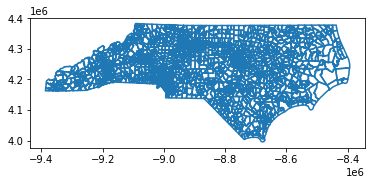

In [50]:
shapefiles_nc.boundary.plot()

In [51]:
print(shapefiles_nc.shape)
vest_shp.shape

(2658, 8)


(2662, 55)

<AxesSubplot:>

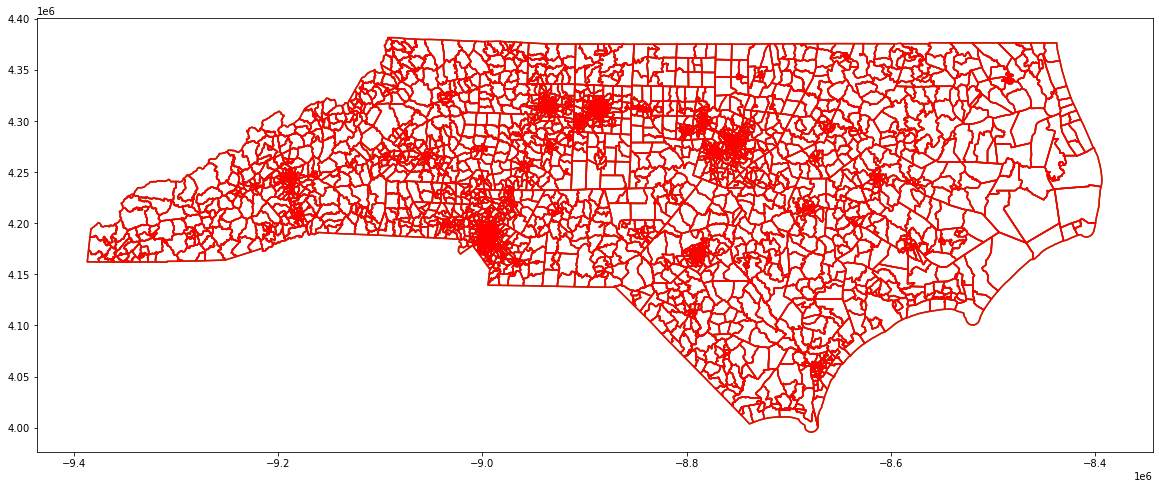

In [52]:
ax = shapefiles_nc.boundary.plot(figsize=(20,20),color="green")
vest_shp.boundary.plot(figsize=(20,20),ax=ax,color="red")

In [53]:
shapefiles_nc["COUNTYFP10"] = shapefiles_nc["county_nam"].map(nc_fips_dict).fillna(shapefiles_nc["county_nam"])

In [54]:
shapefiles_nc["join_col"]=shapefiles_nc['COUNTYFP10']+shapefiles_nc['prec_id']

### Add in precincts from 2019 shapefile

VEST- Buncombe 681, Henderson CV, Wake 01-07A, 07-07A are missing from the 20201018 shapefile. They are added from the 20190827 shapefile.

In [55]:
shapefiles_nc_2019 = gp.read_file('./raw-from-source/SOS/SBE_PRECINCTS_20190827/PRECINCTS_20190827.shp')

In [56]:
shapefiles_nc_2019["COUNTYFP10"] = shapefiles_nc_2019["county_nam"].map(nc_fips_dict).fillna(shapefiles_nc_2019["county_nam"])

In [57]:
shapefiles_nc_2019["join_col"]=shapefiles_nc_2019['COUNTYFP10']+shapefiles_nc_2019['prec_id']

In [58]:
precs = ['021681','089CV','18301-07A','18307-07A']
missing_precs = shapefiles_nc_2019.loc[shapefiles_nc_2019['join_col'].isin(precs)]

In [59]:
shapefiles_nc = pd.concat([shapefiles_nc, missing_precs], axis=0)

In [60]:
join_attempt_one = pd.merge(shapefiles_nc,election_results,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

both          2662
right_only      87
left_only        0
Name: _merge, dtype: int64


In [61]:
join_attempt_one[join_attempt_one['_merge'] != 'both'][['COUNTYFP10_x','prec_id','COUNTYFP10_y','Precinct','join_col']]

,COUNTYFP10_x,prec_id,COUNTYFP10_y,Precinct,join_col
2662,NaN,NaN,017,BAY TREE FIRE DEPT,017BAY TREE FIRE DEPT
2663,NaN,NaN,017,BLAD COUNTY GYM,017BLAD COUNTY GYM
2664,NaN,NaN,017,BOOK T. WASHINGTON,017BOOK T. WASHINGTON
2665,NaN,NaN,017,EAST ARCADIA,017EAST ARCADIA
2666,NaN,NaN,017,SPAULDING MONROE,017SPAULDING MONROE
2667,NaN,NaN,017,TAR HEEL MUNI BLD,017TAR HEEL MUNI BLD
2668,NaN,NaN,021,AVML,021AVML
2669,NaN,NaN,021,AVOM,021AVOM
2670,NaN,NaN,021,BMBL,021BMBL
2671,NaN,NaN,021,BTFD,021BTFD


In [71]:
#Confirm that all the unjoined precincts contain zero votes
for i in races:
    print(sum(join_attempt_one[join_attempt_one['_merge'] != 'both'][i]))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [62]:
shapefiles_nc_comp = join_attempt_one[join_attempt_one['_merge'] == 'both']

In [63]:
final_merge = pd.merge(shapefiles_nc_comp,vest_shp,how="outer",on="join_col",indicator="final_merge")
final_merge["final_merge"].value_counts()

both          2662
left_only        0
right_only       0
Name: final_merge, dtype: int64

In [64]:
final_merge[final_merge["final_merge"] != 'both'][['COUNTYFP10_x','prec_id','COUNTYFP10_y','Precinct','join_col']]

,COUNTYFP10_x,prec_id,COUNTYFP10_y,Precinct,join_col


In [65]:
both = final_merge[final_merge["final_merge"]=="both"]
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_x")
source_geoms = gp.GeoDataFrame(both,geometry="geometry_y")
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

True     2650
False      12
dtype: int64


1) For 68.1-BUNCOMBE difference in area is 1.8267811750642087
2) For 681-BUNCOMBE difference in area is 14.801556576000344


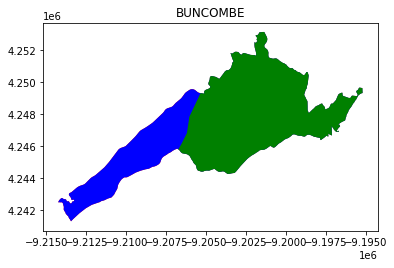

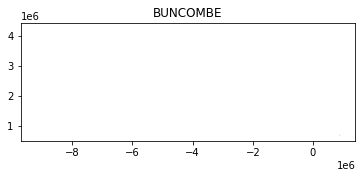

In [66]:
count = 0
area_list = []
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > .5):
        count += 1
        name = source_geoms.iat[i,3]
        county = source_geoms.iat[i,1]
        
        print(str(count)+") For " + str(county) + '-' + str(name) + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [67]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and 0.1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between 0.1 and 0.5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between 0.5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(2662, 1)
2650 precincts w/ a difference of 0 km^2
8 precincts w/ a difference between 0 and 0.1 km^2
2 precincts w/ a difference between 0.1 and 0.5 km^2
0 precincts w/ a difference between 0.5 and 1 km^2
1 precincts w/ a difference between 1 and 2 km^2
0 precincts w/ a difference between 2 and 5 km^2
1 precincts w/ a difference greater than 5 km^2
